In [ ]:
%%capture
!pip install super-gradients
!pip install Pillow==8.0.1

In [ ]:
import torch
import os
import pathlib
import re
from imutils import paths
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import cv2
import time
import PIL

In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from super_gradients.training import models
from super_gradients.common.object_names import Models

yolo_nas_pose = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose").cuda()

The console stream is logged into /root/sg_logs/console.log


[2024-03-31 09:53:48] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-03-31 09:53:48] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-03-31 09:53:53] INFO - utils.py - NumExpr defaulting to 8 threads.
[2024-03-31 09:53:54] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-03-31 09:53:54] WARNING - export.py - Failed to import pytorch_quantization
[2024-03-31 09:53:54] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-03-31 09:53:54] WARNING - env_sanity_check.py - Failed to verify installed packages: pillow==8.0.1 does not satisfy requirement pillow>=10.2.0
[2024-03-31 09:53:55] WARNING - checkpoint_utils.py - :warning: The pre-trained models provided by SuperGradients may have their own licenses or terms and conditions derived from the dataset used for pre-training.
 It is your responsibility to determine whether you have pe

# 🩻 Display only the skeleton



In [ ]:
from super_gradients.training.utils.visualization.detection import draw_bbox
from super_gradients.training.utils.visualization.pose_estimation import PoseVisualization

def process_single_image(image_prediction):
    """
    Process a single image prediction to visualize the pose estimation results on a blank background.

    Parameters:
    - image_prediction : object
        An instance containing the image and its associated pose prediction data.

    Returns:
    - np.ndarray
        An image with the pose skeleton drawn.
    """

    image = image_prediction.image
    pose_data = image_prediction.prediction

    blank_image = np.zeros_like(image)  # for a black background

    skeleton_image = PoseVisualization.draw_poses(
        image=blank_image,
        poses=pose_data.poses,
        boxes=pose_data.bboxes_xyxy,
        scores=pose_data.scores,
        is_crowd=None,
        edge_links=pose_data.edge_links,
        edge_colors=pose_data.edge_colors,
        keypoint_colors=pose_data.keypoint_colors,
        joint_thickness=2,
        box_thickness=2,
        keypoint_radius=5
    )
    return skeleton_image, pose_data, image


def create_video_from_frames(frames, output_filename='output_video.mp4', fps=30.0):
    """
    Create an mp4 video from a list of image frames.

    Parameters:
    - frames : list of np.ndarray
        List of image frames represented as numpy arrays.
    - output_filename : str, optional
        Name of the output video file.
    - fps : float, optional
        Frames per second for the output video.

    Returns:
    - None
    """

    # Determine the width and height from the first frame
    frame_height, frame_width, layers = frames[0].shape

    # Define the codec for .mp4 format
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))

    # Write each frame to the video
    for frame in frames:
        out.write(frame)

    # Close and release everything
    out.release()
    cv2.destroyAllWindows()

[2024-03-31 09:54:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


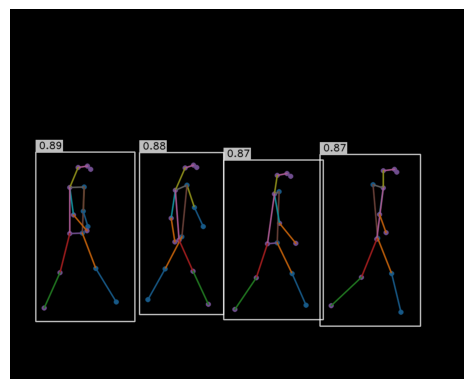

In [ ]:
imgtest = yolo_nas_pose.to('cuda').predict('/content/drive/MyDrive/DrAIgon/beatles-abbeyroad.jpg', conf=.55)


skeleton_image, pose_data, image = process_single_image(imgtest)

plt.imshow(skeleton_image)
plt.axis('off')
plt.show()

[2024-03-31 09:54:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


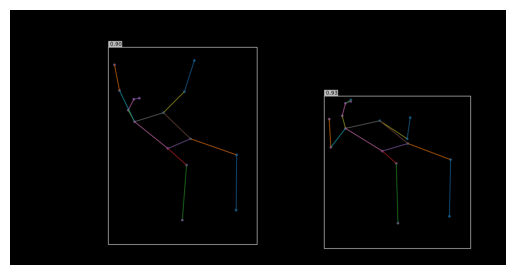

In [ ]:
imgtest = yolo_nas_pose.to('cuda').predict('/content/drive/MyDrive/DrAIgon/2peoplebenchpress.jpg', conf=.55)

skeleton_image, pose_data, image = process_single_image(imgtest)

plt.imshow(skeleton_image)
plt.axis('off')
plt.show()

In [ ]:
# dir(imgtest)

In [ ]:
print(pose_data.poses)

[[[1.4429297e+03 3.8903320e+02 8.5058594e-01]
  [1.4437500e+03 3.8349609e+02 6.4794922e-01]
  [1.4207812e+03 3.9703125e+02 8.6523438e-01]
  [1.4675391e+03 4.0728516e+02 2.4401855e-01]
  [1.4060156e+03 4.5076172e+02 7.1923828e-01]
  [1.5659766e+03 4.7126953e+02 9.7460938e-01]
  [1.4207812e+03 5.0367188e+02 9.4335938e-01]
  [1.6816406e+03 5.4714844e+02 9.2382812e-01]
  [1.3584375e+03 5.8365234e+02 8.8378906e-01]
  [1.6947656e+03 4.5855469e+02 9.1064453e-01]
  [1.3510547e+03 4.6470703e+02 8.6962891e-01]
  [1.6849219e+03 5.6765625e+02 9.2529297e-01]
  [1.5766406e+03 5.9923828e+02 9.4775391e-01]
  [1.8653906e+03 6.3574219e+02 9.3359375e-01]
  [1.6357031e+03 6.5173828e+02 9.5947266e-01]
  [1.8604688e+03 8.7445312e+02 8.8525391e-01]
  [1.6422656e+03 9.0316406e+02 9.1064453e-01]]

 [[5.4714844e+02 3.7611328e+02 7.5048828e-01]
  [5.5083984e+02 3.7037109e+02 4.0258789e-01]
  [5.2417969e+02 3.8062500e+02 6.7675781e-01]
  [5.6929688e+02 3.9375000e+02 1.7053223e-01]
  [5.0080078e+02 4.2697266e+02 5

In [ ]:
print(pose_data.bboxes_xyxy)

[[1330.5469   367.91016 1950.7031  1010.625  ]
 [ 416.3086   161.80664 1046.7188   993.39844]]


In [ ]:
print(pose_data.edge_links)

[[ 0  1]
 [ 0  2]
 [ 1  2]
 [ 1  3]
 [ 2  4]
 [ 3  5]
 [ 4  6]
 [ 5  6]
 [ 5  7]
 [ 5 11]
 [ 6  8]
 [ 6 12]
 [ 7  9]
 [ 8 10]
 [11 12]
 [11 13]
 [12 14]
 [13 15]
 [14 16]]


In [ ]:
print(image.shape)

In [ ]:
result = yolo_nas_pose.to('cuda').predict("/content/drive/MyDrive/DrAIgon/raw_data2/bench-press/bench-press_2.mp4", conf=.4)

processed_frames = [process_single_image(image_prediction)[0] for image_prediction in result._images_prediction_gen]

create_video_from_frames(processed_frames, 'sample.mp4', fps=30.0)

[2024-03-31 09:36:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


# 📽️ Data Processing

In [ ]:
def normalize_data(poses, bboxes, frame_width, frame_height):
    normalized_poses = np.copy(poses)
    normalized_bboxes = np.copy(bboxes)

    normalized_poses[:, :, 0] /= frame_width
    normalized_poses[:, :, 1] /= frame_height

    normalized_bboxes[:, [0, 2]] /= frame_width
    normalized_bboxes[:, [1, 3]] /= frame_height

    return normalized_poses, normalized_bboxes


In [ ]:
def select_primary_pose(poses, bboxes, frame_width, frame_height):
    center_of_frame = np.array([frame_width / 2, frame_height / 2])
    highest_score = -1
    primary_pose = None
    primary_bbox = None

    for pose, bbox in zip(poses, bboxes):
        bbox_center = np.array([(bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2])
        distance_to_center = np.linalg.norm(center_of_frame - bbox_center)
        bbox_area = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])

        score = bbox_area / (distance_to_center + 1)

        if score > highest_score:
            highest_score = score
            primary_pose = pose
            primary_bbox = bbox

    return primary_pose, primary_bbox

In [ ]:
def extract_pose_information_per_frame(video_path, conf_threshold=0.4):
    # Load model
    # yolo_nas_pose = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose").cuda()
    result = yolo_nas_pose.to('cuda').predict(video_path, conf=conf_threshold)

    frame_data_list = []

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Could not open video file")
    ret, frame = cap.read()
    frame_height, frame_width = frame.shape[:2]
    cap.release()

    for image_prediction in result._images_prediction_gen:
        poses = image_prediction.prediction.poses
        bboxes_xyxy = image_prediction.prediction.bboxes_xyxy
        edge_links = image_prediction.prediction.edge_links

        normalized_poses, normalized_bboxes = normalize_data(poses, bboxes_xyxy, frame_width, frame_height)

        primary_pose, primary_bbox = select_primary_pose(normalized_poses, normalized_bboxes, 1, 1)  #

        if primary_pose is not None:
            frame_data = {
                'poses': np.array([primary_pose]),
                'bboxes_xyxy': np.array([primary_bbox]),
                'edge_links': edge_links
            }
            frame_data_list.append(frame_data)
    print(f"Finish processing the video {video_path}")
    return frame_data_list


In [ ]:
def remove_outlier_frames(frame_data_list, area_threshold=0.1, distance_threshold=0.1):
    filtered_frames = []
    prev_area = None
    prev_center = np.array([0.5, 0.5])

    for frame_data in frame_data_list:
        if 'bboxes_xyxy' not in frame_data or len(frame_data['bboxes_xyxy']) == 0:
            continue

        bbox = frame_data['bboxes_xyxy'][0]
        area = (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])
        center = np.array([(bbox[0] + bbox[2]) / 2, (bbox[1] + bbox[3]) / 2])

        if prev_area is not None:
            area_change = abs(area - prev_area)
            center_distance = np.linalg.norm(center - prev_center)

            # Check
            if area_change > area_threshold or center_distance > distance_threshold:
                continue

        prev_area = area
        prev_center = center
        filtered_frames.append(frame_data)

    return filtered_frames


In [ ]:
def processing_for_pose(pose_data_list, save_format="npy", poselist_filename='/content/drive/MyDrive/sample', video_filename='/content/drive/MyDrive/sample.mp4', frame_size=(640,480), fps=30.0):
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    out = cv2.VideoWriter(video_filename, fourcc, fps, frame_size)

    frame_width, frame_height = frame_size
    pose_data_list = remove_outlier_frames(pose_data_list) # Remove outlier step
    only_pose_list = []
    for frame_data in pose_data_list:
        frame = np.zeros((frame_height, frame_width, 3), np.uint8)
        for pose in frame_data['poses']:
            for link in frame_data['edge_links']:
                start_point = (int(pose[link[0], 0] * frame_width), int(pose[link[0], 1] * frame_height))
                end_point = (int(pose[link[1], 0] * frame_width), int(pose[link[1], 1] * frame_height))
                color = (0, 255, 0)  # Skeleton Color
                cv2.line(frame, start_point, end_point, color, 2)
            only_pose_list.append(pose)

        out.write(frame)

    out.release()

    if save_format == 'npy':
        np.save(poselist_filename + '.npy', np.array(only_pose_list))
    elif save_format == 'csv':
      with open(poselist_filename + '.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        for pose in only_pose_list:
            # Flatten pose array
            flattened_pose = pose.flatten()
            writer.writerow(flattened_pose)
    elif save_format == "json":
      pose_list_as_lists = [pose.tolist() for pose in only_pose_list]
      with open(poselist_filename + '.json', 'w') as file:
        json.dump(pose_list_as_lists, file)
    else:
      print("Save format is invalid!")
    return only_pose_list


In [ ]:
pose_data = extract_pose_information_per_frame("/content/drive/MyDrive/DrAIgon/raw_data2/incline-bench-press/incline-bench-press_2.mp4")

[2024-03-26 13:39:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/DrAIgon/raw_data2/incline-bench-press/incline-bench-press_2.mp4


In [ ]:
pose_list = processing_for_pose(pose_data)

In [ ]:
pose_list

[array([[0.5859375 , 0.47361112, 0.67822266],
        [0.6039063 , 0.47152779, 0.70654297],
        [0.5890625 , 0.4611111 , 0.3388672 ],
        [0.62421876, 0.51805556, 0.6645508 ],
        [0.5828125 , 0.484375  , 0.16455078],
        [0.590625  , 0.6215278 , 0.79003906],
        [0.5433594 , 0.54097223, 0.73779297],
        [0.6191406 , 0.6472222 , 0.7089844 ],
        [0.49648437, 0.4954861 , 0.7597656 ],
        [0.6140625 , 0.48923612, 0.69189453],
        [0.4859375 , 0.37361112, 0.7841797 ],
        [0.41445312, 0.8       , 0.4765625 ],
        [0.39042968, 0.7326389 , 0.4580078 ],
        [0.3449219 , 0.83958334, 0.16235352],
        [0.32890624, 0.7736111 , 0.19006348],
        [0.31757814, 0.8673611 , 0.07849121],
        [0.3136719 , 0.79097223, 0.11755371]], dtype=float32),
 array([[0.5875    , 0.46979168, 0.7416992 ],
        [0.6070312 , 0.47361112, 0.7416992 ],
        [0.5925781 , 0.45902777, 0.39135742],
        [0.628125  , 0.53229165, 0.72558594],
        [0.5875  

In [ ]:
def data_processing(input_dir, list_data_dir, video_data_dir, frame_size=(640,480), fps=30.0):
    os.makedirs(list_data_dir, exist_ok=True)
    os.makedirs(video_data_dir, exist_ok=True)

    for category in os.listdir(input_dir):
        print(f"***Processing: {category} ***")
        start_time = time.time()

        category_path = os.path.join(input_dir, category)
        list_category_path = os.path.join(list_data_dir, category)
        video_category_path = os.path.join(video_data_dir, category)

        os.makedirs(list_category_path, exist_ok=True)
        os.makedirs(video_category_path, exist_ok=True)

        video_count = 0

        if os.path.isdir(category_path):
            for video_file in os.listdir(category_path):
                video_path = os.path.join(category_path, video_file)
                base_filename = os.path.splitext(video_file)[0]
                poselist_path = os.path.join(list_category_path, base_filename)
                video_output_path = os.path.join(video_category_path, base_filename + '.mp4')

                if video_path.lower().endswith(('.mp4', '.mov', '.MOV')):
                    pose_data = extract_pose_information_per_frame(video_path)
                    only_pose_list = processing_for_pose(pose_data,
                                                         save_format="npy",
                                                         poselist_filename=poselist_path,
                                                         video_filename=video_output_path,
                                                         frame_size=frame_size,
                                                         fps=fps)
                    video_count += 1

        elapsed_time = time.time() - start_time
        print(f"Processed {video_count} videos in '{category}' in {elapsed_time:.2f} seconds.")

        print(f"Total videos processed in '{video_data_dir}/{category}': {video_count}")

# Apply for dataset

In [ ]:
# Mẫu
input_dir = '/content/drive/MyDrive/DrAIgon/raw_data2'
list_data_dir = '/content/drive/MyDrive/DrAIgon/list_data'
video_data_dir = '/content/drive/MyDrive/DrAIgon/video_data'

In [ ]:
# For data vòng loại
input_dir = '/content/drive/MyDrive/DrAIgon/AI4LIFE2024-DATA/Data - Vòng loại'
list_data_dir = '/content/drive/MyDrive/DrAIgon/list_data_vl'
video_data_dir = '/content/drive/MyDrive/DrAIgon/video_data_vl'

In [ ]:
data_processing(input_dir, list_data_dir, video_data_dir)

***Processing: tricep Pushdown ***


[2024-03-12 10:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_10.mp4


[2024-03-12 10:59:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_13.mp4


[2024-03-12 10:59:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_14.mp4


[2024-03-12 10:59:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_16.mp4


[2024-03-12 10:59:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_11.mp4


[2024-03-12 10:59:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_15.mp4


[2024-03-12 10:59:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_1.mp4


[2024-03-12 10:59:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_12.mp4


[2024-03-12 10:59:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_2.mp4


[2024-03-12 10:59:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_17.mp4


[2024-03-12 10:59:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_20.mp4


[2024-03-12 10:59:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_21.mp4


[2024-03-12 10:59:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_19.mp4


[2024-03-12 10:59:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_23.mp4


[2024-03-12 11:00:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_24.mp4


[2024-03-12 11:00:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_22.mp4


[2024-03-12 11:00:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_18.mp4


[2024-03-12 11:00:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_26.mp4


[2024-03-12 11:00:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_33.mp4


[2024-03-12 11:00:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_3.mp4


[2024-03-12 11:00:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_31.mp4


[2024-03-12 11:00:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_32.mp4


[2024-03-12 11:00:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_25.mp4


[2024-03-12 11:00:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_28.mp4


[2024-03-12 11:00:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_30.mp4


[2024-03-12 11:00:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_29.mp4


[2024-03-12 11:01:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_27.mp4


[2024-03-12 11:01:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_4.mp4


[2024-03-12 11:01:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_34.mp4


[2024-03-12 11:01:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_38.mp4


[2024-03-12 11:01:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_39.mp4


[2024-03-12 11:01:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_36.mp4


[2024-03-12 11:01:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_37.mp4


[2024-03-12 11:01:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_35.mp4


[2024-03-12 11:01:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_41.mp4


[2024-03-12 11:01:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_40.mp4


[2024-03-12 11:02:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_42.mp4


[2024-03-12 11:02:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_44.mp4


[2024-03-12 11:02:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_45.mp4


[2024-03-12 11:02:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_43.mp4


[2024-03-12 11:02:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_46.mp4


[2024-03-12 11:03:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_48.mp4


[2024-03-12 11:03:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_47.mp4


[2024-03-12 11:03:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_5.mp4


[2024-03-12 11:03:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_50.mp4


[2024-03-12 11:03:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_7.mp4


[2024-03-12 11:03:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_9.mp4


[2024-03-12 11:03:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_6.mp4


[2024-03-12 11:03:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_8.mp4


[2024-03-12 11:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep Pushdown/tricep pushdown_49.mp4
Processed 50 videos in 'tricep Pushdown' in 318.69 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/tricep Pushdown': 50
***Processing: tricep dips ***


[2024-03-12 11:04:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_1.MOV


[2024-03-12 11:04:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_10.mp4


[2024-03-12 11:05:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_11.mp4


[2024-03-12 11:05:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_12.mp4


[2024-03-12 11:05:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_13.mp4


[2024-03-12 11:05:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_14.mp4


[2024-03-12 11:05:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_15.mp4


[2024-03-12 11:05:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_16.mp4


[2024-03-12 11:05:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_17.mp4


[2024-03-12 11:06:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_18.mp4


[2024-03-12 11:06:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_19.mp4


[2024-03-12 11:07:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_2.MOV


[2024-03-12 11:08:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_20.mp4


[2024-03-12 11:08:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_4.MOV


[2024-03-12 11:08:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_3.MOV


[2024-03-12 11:08:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_6.mp4


[2024-03-12 11:09:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_5.mp4


[2024-03-12 11:09:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_8.mp4


[2024-03-12 11:09:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_7.mp4


[2024-03-12 11:09:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/tricep dips/tricep dips_9.mp4
Processed 20 videos in 'tricep dips' in 347.56 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/tricep dips': 20
***Processing: t bar row ***


[2024-03-12 11:10:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_11.mp4


[2024-03-12 11:10:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_1.MOV


[2024-03-12 11:10:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_10.mp4


[2024-03-12 11:10:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_13.mp4


[2024-03-12 11:10:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_14.mp4


[2024-03-12 11:10:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_12.mp4


[2024-03-12 11:10:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_15.mp4


[2024-03-12 11:11:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_18.mp4


[2024-03-12 11:11:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_16.mp4


[2024-03-12 11:11:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_17.mp4


[2024-03-12 11:11:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_19.mp4


[2024-03-12 11:12:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_2.MOV


[2024-03-12 11:12:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_20.mp4


[2024-03-12 11:13:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_21.mp4


[2024-03-12 11:13:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_3.MOV


[2024-03-12 11:14:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_4.MOV


[2024-03-12 11:14:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_5.MOV


[2024-03-12 11:14:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_6.MOV


[2024-03-12 11:15:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_8.mp4


[2024-03-12 11:15:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_7.MOV


[2024-03-12 11:15:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/t bar row/t bar row_9.mp4
Processed 21 videos in 't bar row' in 362.11 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/t bar row': 21
***Processing: squat ***


[2024-03-12 11:16:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_1.MOV


[2024-03-12 11:16:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_11.mp4


[2024-03-12 11:16:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_12.mp4


[2024-03-12 11:16:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_13.mp4


[2024-03-12 11:16:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_10.mp4


[2024-03-12 11:17:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_15.mp4


[2024-03-12 11:17:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_16.mp4


[2024-03-12 11:17:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_19.mp4


[2024-03-12 11:17:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_17.mp4


[2024-03-12 11:17:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_14.mp4


[2024-03-12 11:17:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_18.mp4


[2024-03-12 11:17:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_2.MOV


[2024-03-12 11:18:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_22.mp4


[2024-03-12 11:18:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_21.mp4


[2024-03-12 11:18:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_20.mp4


[2024-03-12 11:18:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_24.mp4


[2024-03-12 11:18:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_23.mp4


[2024-03-12 11:19:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_26.mp4


[2024-03-12 11:19:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_25.mp4


[2024-03-12 11:19:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_28.mp4


[2024-03-12 11:19:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_27.mp4


[2024-03-12 11:20:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_29.mp4


[2024-03-12 11:20:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_3.MOV


[2024-03-12 11:21:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_4.MOV


[2024-03-12 11:21:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_5.MOV


[2024-03-12 11:22:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_6.MOV


[2024-03-12 11:22:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_7.mp4


[2024-03-12 11:23:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_8.mp4


[2024-03-12 11:23:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/squat/squat_9.mp4
Processed 29 videos in 'squat' in 426.80 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/squat': 29
***Processing: russian twist ***


[2024-03-12 11:23:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_11.mp4


[2024-03-12 11:23:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_1.MOV


[2024-03-12 11:24:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_10.mp4


[2024-03-12 11:24:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_2.mp4


[2024-03-12 11:24:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_3.mp4


[2024-03-12 11:24:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_4.mp4


[2024-03-12 11:25:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_12.mp4


[2024-03-12 11:25:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_13.mp4


[2024-03-12 11:25:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_7.mp4


[2024-03-12 11:25:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_5.mp4


[2024-03-12 11:26:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_6.mp4


[2024-03-12 11:26:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_9.mp4


[2024-03-12 11:27:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/russian twist/russian twist_8.mp4
Processed 13 videos in 'russian twist' in 247.99 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/russian twist': 13
***Processing: shoulder press ***


[2024-03-12 11:27:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_1.MOV


[2024-03-12 11:27:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_10.mp4


[2024-03-12 11:27:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_11.mp4


[2024-03-12 11:28:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_13.mp4


[2024-03-12 11:28:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_12.mp4


[2024-03-12 11:28:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_14.mp4


[2024-03-12 11:28:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_15.mp4


[2024-03-12 11:28:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_16.mp4


[2024-03-12 11:28:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_17.mp4


[2024-03-12 11:29:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_2.MOV


[2024-03-12 11:29:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_3.MOV


[2024-03-12 11:30:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_4.MOV


[2024-03-12 11:30:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_5.mp4


[2024-03-12 11:30:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_6.mp4


[2024-03-12 11:30:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_8.mp4


[2024-03-12 11:30:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_7.mp4


[2024-03-12 11:31:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/shoulder press/shoulder press_9.mp4
Processed 17 videos in 'shoulder press' in 242.57 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/shoulder press': 17
***Processing: romanian deadlift ***


[2024-03-12 11:31:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_1.mov


[2024-03-12 11:31:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_10.mp4


[2024-03-12 11:31:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_12.mp4


[2024-03-12 11:31:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_11.mp4


[2024-03-12 11:32:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_13.mp4


[2024-03-12 11:32:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_14.mp4


[2024-03-12 11:32:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_2.MOV


[2024-03-12 11:33:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_3.mov


[2024-03-12 11:33:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_4.MOV


[2024-03-12 11:33:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_5.mp4


[2024-03-12 11:34:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_6.mp4


[2024-03-12 11:34:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_7.mp4


[2024-03-12 11:34:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_8.mp4


[2024-03-12 11:36:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/romanian deadlift/romanian deadlift_9.mp4
Processed 14 videos in 'romanian deadlift' in 312.60 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/romanian deadlift': 14
***Processing: leg extension ***


[2024-03-12 11:36:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_1.MOV


[2024-03-12 11:36:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_10.mp4


[2024-03-12 11:37:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_12.mp4


[2024-03-12 11:37:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_11.mp4


[2024-03-12 11:37:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_13.mp4


[2024-03-12 11:37:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_17.mp4


[2024-03-12 11:37:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_15.mp4


[2024-03-12 11:37:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_16.mp4


[2024-03-12 11:37:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_14.mp4


[2024-03-12 11:37:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_18.mp4


[2024-03-12 11:38:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_19.mp4


[2024-03-12 11:38:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_21.mp4


[2024-03-12 11:38:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_20.mp4


[2024-03-12 11:38:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_2.MOV


[2024-03-12 11:39:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_22.mp4


[2024-03-12 11:39:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_25.mp4


[2024-03-12 11:39:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_24.mp4


[2024-03-12 11:39:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_23.mp4


[2024-03-12 11:39:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_3.MOV


[2024-03-12 11:40:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_4.MOV


[2024-03-12 11:40:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_5.MOV


[2024-03-12 11:40:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_6.MOV


[2024-03-12 11:41:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_7.mp4


[2024-03-12 11:41:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_9.mp4


[2024-03-12 11:41:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg extension/leg extension_8.mp4
Processed 25 videos in 'leg extension' in 292.35 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/leg extension': 25
***Processing: pull Up ***


[2024-03-12 11:41:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_11.mp4


[2024-03-12 11:41:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_1.mp4


[2024-03-12 11:42:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_10.mp4


[2024-03-12 11:42:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_14.mp4


[2024-03-12 11:42:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_12.mp4


[2024-03-12 11:42:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_13.mp4


[2024-03-12 11:42:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_17.mp4


[2024-03-12 11:42:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_19.mp4


[2024-03-12 11:42:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_18.mp4


[2024-03-12 11:43:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_16.mp4


[2024-03-12 11:43:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_15.mp4


[2024-03-12 11:43:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_20.mp4


[2024-03-12 11:43:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_2.mp4


[2024-03-12 11:43:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_21.mp4


[2024-03-12 11:43:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_22.mp4


[2024-03-12 11:44:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_24.mp4


[2024-03-12 11:44:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_25.mp4


[2024-03-12 11:44:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_26.mp4


[2024-03-12 11:44:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_23.mp4


[2024-03-12 11:44:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_3.mp4


[2024-03-12 11:45:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_4.mp4


[2024-03-12 11:46:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_5.mp4


[2024-03-12 11:46:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_7.mp4


[2024-03-12 11:46:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_6.mp4


[2024-03-12 11:46:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_9.mp4


[2024-03-12 11:46:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/pull Up/pull up_8.mp4
Processed 26 videos in 'pull Up' in 330.42 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/pull Up': 26
***Processing: leg raises ***


[2024-03-12 11:46:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_11.mp4


[2024-03-12 11:47:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_10.mp4


[2024-03-12 11:47:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_1.MOV


[2024-03-12 11:47:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_15.mp4


[2024-03-12 11:47:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_12.mp4


[2024-03-12 11:47:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_14.mp4


[2024-03-12 11:48:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_13.mp4


[2024-03-12 11:48:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_18.mp4


[2024-03-12 11:48:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_16.mp4


[2024-03-12 11:48:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_17.mp4


[2024-03-12 11:48:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_19.mp4


[2024-03-12 11:48:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_21.mp4


[2024-03-12 11:48:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_20.mp4


[2024-03-12 11:49:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_2.MOV


[2024-03-12 11:49:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_3.MOV


[2024-03-12 11:49:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_4.MOV


[2024-03-12 11:50:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_5.MOV


[2024-03-12 11:50:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_7.mp4


[2024-03-12 11:50:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_6.MOV


[2024-03-12 11:51:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_8.mp4


[2024-03-12 11:51:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/leg raises/leg raises_9.mp4
Processed 21 videos in 'leg raises' in 276.24 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/leg raises': 21
***Processing: plank ***


[2024-03-12 11:51:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_1.MOV


[2024-03-12 11:52:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_2.mp4


[2024-03-12 11:52:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_4.mp4


[2024-03-12 11:52:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_3.mp4


[2024-03-12 11:52:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_6.mp4


[2024-03-12 11:53:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_5.mp4


[2024-03-12 11:53:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/plank/plank_7.mp4
Processed 7 videos in 'plank' in 358.76 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/plank': 7
***Processing: lateral raise ***


[2024-03-12 11:57:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_1.MOV


[2024-03-12 11:57:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_10.mp4


[2024-03-12 11:58:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_13.mp4


[2024-03-12 11:58:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_11.mp4


[2024-03-12 11:58:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_12.mp4


[2024-03-12 11:58:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_15.mp4


[2024-03-12 11:58:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_14.mp4


[2024-03-12 11:58:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_16.mp4


[2024-03-12 11:58:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_17.mp4


[2024-03-12 11:58:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_18.mp4


[2024-03-12 11:58:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_19.mp4


[2024-03-12 11:59:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_2.MOV


[2024-03-12 11:59:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_21.mp4


[2024-03-12 11:59:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_22.mp4


[2024-03-12 11:59:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_20.mp4


[2024-03-12 11:59:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_23.mp4


[2024-03-12 11:59:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_24.mp4


[2024-03-12 11:59:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_25.mp4


[2024-03-12 11:59:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_28.mp4


[2024-03-12 12:00:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_27.mp4


[2024-03-12 12:00:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_26.mp4


[2024-03-12 12:00:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_29.mp4


[2024-03-12 12:00:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_31.mp4


[2024-03-12 12:00:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_30.mp4


[2024-03-12 12:01:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_3.MOV


[2024-03-12 12:01:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_32.mp4


[2024-03-12 12:01:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_33.mp4


[2024-03-12 12:01:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_34.mp4


[2024-03-12 12:02:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_36.mp4


[2024-03-12 12:02:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_37.mp4


[2024-03-12 12:02:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_35.mp4


[2024-03-12 12:02:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_4.MOV


[2024-03-12 12:03:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_5.MOV


[2024-03-12 12:03:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_6.MOV


[2024-03-12 12:04:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_8.mp4


[2024-03-12 12:04:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_7.mp4


[2024-03-12 12:04:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lateral raise/lateral raise_9.mp4
Processed 37 videos in 'lateral raise' in 419.20 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/lateral raise': 37
***Processing: lat pulldown ***


[2024-03-12 12:04:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_12.mp4


[2024-03-12 12:04:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_13.mp4


[2024-03-12 12:04:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_11.mp4


[2024-03-12 12:04:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_10.mp4


[2024-03-12 12:04:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_1.mp4


[2024-03-12 12:05:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_14.mp4


[2024-03-12 12:05:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_16.mp4


[2024-03-12 12:05:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_18.mp4


[2024-03-12 12:05:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_20.mp4


[2024-03-12 12:05:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_17.mp4


[2024-03-12 12:05:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_19.mp4


[2024-03-12 12:05:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_15.mp4


[2024-03-12 12:05:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_2.mp4


[2024-03-12 12:05:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_23.mp4


[2024-03-12 12:05:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_25.mp4


[2024-03-12 12:05:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_21.mp4


[2024-03-12 12:06:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_26.mp4


[2024-03-12 12:06:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_24.mp4


[2024-03-12 12:06:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_22.mp4


[2024-03-12 12:06:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_28.mp4


[2024-03-12 12:06:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_27.mp4


[2024-03-12 12:06:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_3.mp4


[2024-03-12 12:06:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_29.mp4


[2024-03-12 12:06:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_33.mp4


[2024-03-12 12:06:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_34.mp4


[2024-03-12 12:06:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_30.mp4


[2024-03-12 12:07:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_32.mp4


[2024-03-12 12:07:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_31.mp4


[2024-03-12 12:07:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_36.mp4


[2024-03-12 12:07:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_37.mp4


[2024-03-12 12:07:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_38.mp4


[2024-03-12 12:07:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_35.mp4


[2024-03-12 12:07:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_39.mp4


[2024-03-12 12:07:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_41.mp4


[2024-03-12 12:07:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_40.mp4


[2024-03-12 12:07:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_42.mp4


[2024-03-12 12:08:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_4.mp4


[2024-03-12 12:08:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_45.mp4


[2024-03-12 12:08:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_44.mp4


[2024-03-12 12:08:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_43.mp4


[2024-03-12 12:08:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_48.mp4


[2024-03-12 12:08:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_47.mp4


[2024-03-12 12:08:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_46.mp4


[2024-03-12 12:08:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_49.mp4


[2024-03-12 12:09:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_51.mp4


[2024-03-12 12:09:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_8.mp4


[2024-03-12 12:09:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_5.mp4


[2024-03-12 12:09:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_50.mp4


[2024-03-12 12:09:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_6.mp4


[2024-03-12 12:09:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_9.mp4


[2024-03-12 12:09:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/lat pulldown/lat pulldown_7.mp4
Processed 51 videos in 'lat pulldown' in 325.05 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/lat pulldown': 51
***Processing: push-up ***


[2024-03-12 12:09:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_15.mp4


[2024-03-12 12:10:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_13.mp4


[2024-03-12 12:10:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_14.mp4


[2024-03-12 12:10:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_10.mp4


[2024-03-12 12:10:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_12.mp4


[2024-03-12 12:10:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_1.mp4


[2024-03-12 12:10:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_11.mp4


[2024-03-12 12:10:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_21.mp4


[2024-03-12 12:11:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_17.mp4


[2024-03-12 12:11:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_2.mp4


[2024-03-12 12:11:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_18.mp4


[2024-03-12 12:11:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_25.mp4


[2024-03-12 12:11:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_19.mp4


[2024-03-12 12:11:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_16.mp4


[2024-03-12 12:11:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_22.mp4


[2024-03-12 12:11:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_24.mp4


[2024-03-12 12:12:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_23.mp4


[2024-03-12 12:12:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_20.mp4


[2024-03-12 12:12:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_26.mp4


[2024-03-12 12:12:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_32.mp4


[2024-03-12 12:12:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_33.mp4


[2024-03-12 12:12:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_3.mp4


[2024-03-12 12:12:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_31.mp4


[2024-03-12 12:13:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_29.mp4


[2024-03-12 12:13:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_30.mp4


[2024-03-12 12:13:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_28.mp4


[2024-03-12 12:13:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_27.mp4


[2024-03-12 12:13:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_40.mp4


[2024-03-12 12:13:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_39.mp4


[2024-03-12 12:13:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_36.mp4


[2024-03-12 12:14:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_34.mp4


[2024-03-12 12:14:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_37.mp4


[2024-03-12 12:14:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_38.mp4


[2024-03-12 12:14:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_35.mp4


[2024-03-12 12:14:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_4.mp4


[2024-03-12 12:14:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_44.mp4


[2024-03-12 12:14:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_42.mp4


[2024-03-12 12:14:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_41.mp4


[2024-03-12 12:15:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_46.mp4


[2024-03-12 12:15:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_47.mp4


[2024-03-12 12:15:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_45.mp4


[2024-03-12 12:15:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_43.mp4


[2024-03-12 12:15:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_48.mp4


[2024-03-12 12:15:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_5.mp4


[2024-03-12 12:15:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_49.mp4


[2024-03-12 12:16:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_52.mp4


[2024-03-12 12:16:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_51.mp4


[2024-03-12 12:16:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_50.mp4


[2024-03-12 12:16:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_53.mp4


[2024-03-12 12:17:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_54.mp4


[2024-03-12 12:17:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_56.mp4


[2024-03-12 12:17:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_55.mp4


[2024-03-12 12:18:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_7.mp4


[2024-03-12 12:18:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_9.mp4


[2024-03-12 12:18:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_8.mp4


[2024-03-12 12:18:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/push-up/push-up_6.mp4
Processed 56 videos in 'push-up' in 537.01 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/push-up': 56
***Processing: hip thrust ***


[2024-03-12 12:18:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/Barbell_Hip_Thrust_Tutorial__gluteworkout_AdobeExpress.mp4


[2024-03-12 12:18:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_1.MOV


[2024-03-12 12:19:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_12.mp4


[2024-03-12 12:19:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_10.mp4


[2024-03-12 12:19:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_11.mp4


[2024-03-12 12:19:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_13.mp4


[2024-03-12 12:20:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_14.mp4


[2024-03-12 12:20:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_15.mp4


[2024-03-12 12:20:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_16.mp4


[2024-03-12 12:20:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_17.mp4


[2024-03-12 12:20:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_2.MOV


[2024-03-12 12:21:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_3.MOV


[2024-03-12 12:21:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_4.MOV


[2024-03-12 12:22:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_6.mp4


[2024-03-12 12:22:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_5.mp4


[2024-03-12 12:23:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_9.mp4


[2024-03-12 12:23:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_8.mp4


[2024-03-12 12:23:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hip thrust/hip thrust_7.mp4
Processed 18 videos in 'hip thrust' in 298.09 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/hip thrust': 18
***Processing: incline bench press ***


[2024-03-12 12:23:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_1.mp4


[2024-03-12 12:23:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_13.mp4


[2024-03-12 12:24:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_15.mp4


[2024-03-12 12:24:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_11.mp4


[2024-03-12 12:24:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_14.mp4


[2024-03-12 12:24:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_12.mp4


[2024-03-12 12:24:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_10.mp4


[2024-03-12 12:24:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_2.mp4


[2024-03-12 12:24:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_17.mp4


[2024-03-12 12:24:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_22.mp4


[2024-03-12 12:24:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_19.mp4


[2024-03-12 12:24:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_16.mp4


[2024-03-12 12:24:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_20.mp4


[2024-03-12 12:24:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_21.mp4


[2024-03-12 12:24:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_18.mp4


[2024-03-12 12:25:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_23.mp4


[2024-03-12 12:25:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_25.mp4


[2024-03-12 12:25:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_24.mp4


[2024-03-12 12:25:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_26.mp4


[2024-03-12 12:25:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_27.mp4


[2024-03-12 12:26:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_29.mp4


[2024-03-12 12:26:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_28.mp4


[2024-03-12 12:27:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_3.mp4


[2024-03-12 12:27:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_30.mp4


[2024-03-12 12:27:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_31.mp4


[2024-03-12 12:28:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_6.mp4


[2024-03-12 12:28:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_33.mp4


[2024-03-12 12:28:27] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_7.mp4


[2024-03-12 12:28:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_5.mp4


[2024-03-12 12:28:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_4.mp4


[2024-03-12 12:28:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_32.mp4


[2024-03-12 12:29:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_8.mp4


[2024-03-12 12:29:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/incline bench press/incline bench press_9.mp4
Processed 33 videos in 'incline bench press' in 331.84 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/incline bench press': 33
***Processing: hammer curl ***


[2024-03-12 12:29:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_1.MOV


[2024-03-12 12:29:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_10.mp4


[2024-03-12 12:29:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_12.mp4


[2024-03-12 12:29:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_11.mp4


[2024-03-12 12:30:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_14.mp4


[2024-03-12 12:30:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_16.mp4


[2024-03-12 12:30:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_13.mp4


[2024-03-12 12:30:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_15.mp4


[2024-03-12 12:30:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_18.mp4


[2024-03-12 12:30:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_17.mp4


[2024-03-12 12:31:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_19.mp4


[2024-03-12 12:31:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_2.MOV


[2024-03-12 12:31:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_3.MOV


[2024-03-12 12:32:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_4.MOV


[2024-03-12 12:32:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_5.MOV


[2024-03-12 12:32:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_6.MOV


[2024-03-12 12:33:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_7.MOV


[2024-03-12 12:33:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_8.mp4


[2024-03-12 12:33:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/hammer curl/hammer curl_9.mp4
Processed 19 videos in 'hammer curl' in 281.42 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/hammer curl': 19
***Processing: deadlift ***


[2024-03-12 12:34:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_14.mp4


[2024-03-12 12:34:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_10.mp4


[2024-03-12 12:34:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_1.mp4


[2024-03-12 12:34:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_13.mp4


[2024-03-12 12:34:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_12.mp4


[2024-03-12 12:34:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_11.mp4


[2024-03-12 12:34:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_16.mp4


[2024-03-12 12:35:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_15.mp4


[2024-03-12 12:35:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_20.mp4


[2024-03-12 12:35:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_17.mp4


[2024-03-12 12:35:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_21.mp4


[2024-03-12 12:35:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_18.mp4


[2024-03-12 12:35:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_22.mp4


[2024-03-12 12:35:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_23.mp4


[2024-03-12 12:35:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_19.mp4


[2024-03-12 12:35:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_2.mp4


[2024-03-12 12:35:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_24.mp4


[2024-03-12 12:36:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_25.mp4


[2024-03-12 12:36:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_3.mp4


[2024-03-12 12:36:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_27.mp4


[2024-03-12 12:36:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_28.mp4


[2024-03-12 12:37:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_26.mp4


[2024-03-12 12:37:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_29.mp4


[2024-03-12 12:37:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_31.mp4


[2024-03-12 12:37:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_32.mp4


[2024-03-12 12:37:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_30.mp4


[2024-03-12 12:37:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_4.mp4


[2024-03-12 12:37:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_5.mp4


[2024-03-12 12:37:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_9.mp4


[2024-03-12 12:38:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_7.mp4


[2024-03-12 12:38:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_6.mp4


[2024-03-12 12:38:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/deadlift/deadlift_8.mp4
Processed 32 videos in 'deadlift' in 268.00 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/deadlift': 32
***Processing: decline bench press ***


[2024-03-12 12:38:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_1.mp4


[2024-03-12 12:38:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_12.mp4


[2024-03-12 12:38:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_11.mp4


[2024-03-12 12:39:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_10.mp4


[2024-03-12 12:39:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_2.MOV


[2024-03-12 12:39:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_3.MOV


[2024-03-12 12:39:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_4.MOV


[2024-03-12 12:40:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_5.MOV


[2024-03-12 12:41:19] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_6.MOV


[2024-03-12 12:42:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_9.mp4


[2024-03-12 12:42:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_8.mp4


[2024-03-12 12:42:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/decline bench press/dbp_7.MOV
Processed 12 videos in 'decline bench press' in 261.45 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/decline bench press': 12
***Processing: chest fly machine ***


[2024-03-12 12:42:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_13.mp4


[2024-03-12 12:42:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_14.mp4


[2024-03-12 12:43:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_11.mp4


[2024-03-12 12:43:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_15.mp4


[2024-03-12 12:43:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_12.mp4


[2024-03-12 12:43:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_10.mp4


[2024-03-12 12:43:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_1.mp4


[2024-03-12 12:43:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_19.mp4


[2024-03-12 12:43:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_20.mp4


[2024-03-12 12:44:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_21.mp4


[2024-03-12 12:44:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_18.mp4


[2024-03-12 12:44:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_2.mp4


[2024-03-12 12:44:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_16.mp4


[2024-03-12 12:44:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_17.mp4


[2024-03-12 12:44:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_22.mp4


[2024-03-12 12:45:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_24.mp4


[2024-03-12 12:45:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_25.mp4


[2024-03-12 12:45:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_23.mp4


[2024-03-12 12:45:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_26.mp4


[2024-03-12 12:46:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_28.mp4


[2024-03-12 12:46:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_5.mp4


[2024-03-12 12:46:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_3.mp4


[2024-03-12 12:46:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_4.mp4


[2024-03-12 12:46:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_6.mp4


[2024-03-12 12:46:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_27.mp4


[2024-03-12 12:46:46] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_8.mp4


[2024-03-12 12:46:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_7.mp4


[2024-03-12 12:47:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/chest fly machine/chest fly machine_9.mp4
Processed 28 videos in 'chest fly machine' in 256.41 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/chest fly machine': 28
***Processing: barbell biceps curl ***


[2024-03-12 12:47:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_11.mp4


[2024-03-12 12:47:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_10.mp4


[2024-03-12 12:47:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_1.mp4


[2024-03-12 12:47:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_20.mp4


[2024-03-12 12:47:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_18.mp4


[2024-03-12 12:47:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_26.mp4


[2024-03-12 12:47:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_22.mp4


[2024-03-12 12:47:43] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_14.mp4


[2024-03-12 12:47:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_2.mp4


[2024-03-12 12:47:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_23.mp4


[2024-03-12 12:47:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_13.mp4


[2024-03-12 12:48:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_25.mp4


[2024-03-12 12:48:09] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_19.mp4


[2024-03-12 12:48:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_24.mp4


[2024-03-12 12:48:17] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_15.mp4


[2024-03-12 12:48:21] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_16.mp4


[2024-03-12 12:48:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_17.mp4


[2024-03-12 12:48:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_21.mp4


[2024-03-12 12:48:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_12.mp4


[2024-03-12 12:48:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_37.mp4


[2024-03-12 12:48:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_33.mp4


[2024-03-12 12:48:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_31.mp4


[2024-03-12 12:48:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_35.mp4


[2024-03-12 12:48:56] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_28.mp4


[2024-03-12 12:48:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_32.mp4


[2024-03-12 12:49:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_30.mp4


[2024-03-12 12:49:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_29.mp4


[2024-03-12 12:49:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_39.mp4


[2024-03-12 12:49:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_38.mp4


[2024-03-12 12:49:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_3.mp4


[2024-03-12 12:49:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_34.mp4


[2024-03-12 12:49:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_27.mp4


[2024-03-12 12:49:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_36.mp4


[2024-03-12 12:49:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_4.mp4


[2024-03-12 12:49:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_41.mp4


[2024-03-12 12:49:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_42.mp4


[2024-03-12 12:49:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_43.mp4


[2024-03-12 12:49:58] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_40.mp4


[2024-03-12 12:50:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_49.mp4


[2024-03-12 12:50:11] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_48.mp4


[2024-03-12 12:50:14] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_51.mp4


[2024-03-12 12:50:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_5.mp4


[2024-03-12 12:50:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_45.mp4


[2024-03-12 12:50:47] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_50.mp4


[2024-03-12 12:50:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_47.mp4


[2024-03-12 12:50:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_46.mp4


[2024-03-12 12:51:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_44.mp4


[2024-03-12 12:51:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_57.mp4


[2024-03-12 12:51:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_55.mp4


[2024-03-12 12:51:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_54.mp4


[2024-03-12 12:51:35] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_56.mp4


[2024-03-12 12:51:44] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_58.mp4


[2024-03-12 12:51:52] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_53.mp4


[2024-03-12 12:51:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_59.mp4


[2024-03-12 12:52:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_52.mp4


[2024-03-12 12:52:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_6.mp4


[2024-03-12 12:52:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_8.mp4


[2024-03-12 12:52:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_61.mp4


[2024-03-12 12:52:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_60.mp4


[2024-03-12 12:52:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_7.mp4


[2024-03-12 12:52:59] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_9.mp4


[2024-03-12 12:53:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/barbell biceps curl/barbell biceps curl_62.mp4
Processed 62 videos in 'barbell biceps curl' in 359.71 seconds.
Total videos processed in '/content/drive/MyDrive/AI4LIFE/video_data_vl/barbell biceps curl': 62
***Processing: bench press ***


[2024-03-12 12:53:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_1.mp4


[2024-03-12 12:53:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_12.mp4


[2024-03-12 12:53:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_10.mp4


[2024-03-12 12:53:25] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_11.mp4


[2024-03-12 12:53:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_24.mp4


[2024-03-12 12:53:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_19.mp4


[2024-03-12 12:53:37] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_26.mp4


[2024-03-12 12:53:41] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_16.mp4


[2024-03-12 12:53:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_22.mp4


[2024-03-12 12:53:49] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_14.mp4


[2024-03-12 12:53:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_2.mp4


[2024-03-12 12:53:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_13.mp4


[2024-03-12 12:54:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_18.mp4


[2024-03-12 12:54:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_17.mp4


[2024-03-12 12:54:12] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_25.mp4


[2024-03-12 12:54:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_15.mp4


[2024-03-12 12:54:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_21.mp4


[2024-03-12 12:54:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_20.mp4


[2024-03-12 12:54:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_23.mp4


[2024-03-12 12:54:34] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_30.mp4


[2024-03-12 12:54:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_27.mp4


[2024-03-12 12:54:42] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_28.mp4


[2024-03-12 12:54:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_3.mp4


[2024-03-12 12:54:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_29.mp4


[2024-03-12 12:55:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_31.mp4


[2024-03-12 12:55:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_32.mp4


[2024-03-12 12:55:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_35.mp4


[2024-03-12 12:55:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_34.mp4


[2024-03-12 12:55:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_33.mp4


[2024-03-12 12:55:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_36.mp4


[2024-03-12 12:55:32] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_37.mp4


[2024-03-12 12:55:48] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_38.mp4


[2024-03-12 12:55:51] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_39.mp4


[2024-03-12 12:56:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_4.mp4


[2024-03-12 12:56:26] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_41.mp4


[2024-03-12 12:56:29] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_40.mp4


[2024-03-12 12:56:39] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_42.mp4


[2024-03-12 12:56:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_44.mp4


[2024-03-12 12:56:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_43.mp4


[2024-03-12 12:56:54] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_48.mp4


[2024-03-12 12:57:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_47.mp4


[2024-03-12 12:57:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_45.mp4


[2024-03-12 12:57:08] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_46.mp4


[2024-03-12 12:57:10] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_53.mp4


[2024-03-12 12:57:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_50.mp4


[2024-03-12 12:57:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_51.mp4


[2024-03-12 12:57:18] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_52.mp4


[2024-03-12 12:57:20] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_54.mp4


[2024-03-12 12:57:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_49.mp4


[2024-03-12 12:57:28] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_5.mp4


[2024-03-12 12:57:31] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_56.mp4


[2024-03-12 12:57:36] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_58.mp4


[2024-03-12 12:57:38] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_55.mp4


[2024-03-12 12:57:40] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_57.mp4


[2024-03-12 12:57:45] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_6.mp4


[2024-03-12 12:57:50] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_7.mp4


[2024-03-12 12:57:55] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_61.mp4


[2024-03-12 12:58:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_60.mp4


[2024-03-12 12:58:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_59.mp4


[2024-03-12 12:58:13] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


Finish processing the video /content/drive/MyDrive/AI4LIFE/AI4LIFE2024-DATA/Data - Vòng loại/bench press/bench press_9.mp4


[2024-03-12 12:58:16] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


In [ ]:
# For test vòng loại
input_dir_test = '/content/drive/MyDrive/DrAIgon/AI4LIFE2024-DATA/Test - Vòng loại - 2'
list_data_dir_test = '/content/drive/MyDrive/DrAIgon/list_data_tvl'
video_data_dir_test = '/content/drive/MyDrive/DrAIgon/video_data_tvl'

In [ ]:
data_processing(input_dir_test, list_data_dir_test, video_data_dir_test)


NameError: name 'data_processing' is not defined

# Util

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torch.utils.data import Dataset
import numpy as np
from sklearn.model_selection import train_test_split

class GymPoseDataset(Dataset):
    def __init__(self, list_data_dir, transform=None, augment=False, fixed_length=100):
        self.list_data_dir = list_data_dir
        self.transform = transform
        self.augment = augment
        self.fixed_length = fixed_length
        self.data_info, self.class_to_index = self.get_data_info_and_class_mapping()

    def get_data_info_and_class_mapping(self):
        data_info = []
        class_names = set()
        for class_dir in os.listdir(self.list_data_dir):
            class_dir_path = os.path.join(self.list_data_dir, class_dir)
            for file_name in os.listdir(class_dir_path):
                file_path = os.path.join(class_dir_path, file_name)
                data_info.append((file_path, class_dir))
                class_names.add(class_dir)
        class_to_index = {class_name: i for i, class_name in enumerate(sorted(class_names))}
        return data_info, class_to_index

    def __len__(self):
        return len(self.data_info)

    def time_warp(self, data, warp_factor=0.2):
        sequence_length = data.shape[0]
        new_length = int(sequence_length * warp_factor)

        warped_data = np.zeros((new_length, data.shape[1], data.shape[2]))
        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                warped_data[:, i, j] = np.interp(np.linspace(0, sequence_length, new_length), np.arange(sequence_length), data[:, i, j])

        return warped_data

    def __getitem__(self, idx):
        file_path, class_name = self.data_info[idx]
        data = np.load(file_path)

        if self.augment:
            data = self.time_warp(data)

        if data.shape[0] < self.fixed_length:
            padding = np.zeros((self.fixed_length - data.shape[0], data.shape[1], data.shape[2]))
            data = np.concatenate((data, padding), axis=0)
        elif data.shape[0] > self.fixed_length:
            data = data[:self.fixed_length, :, :]

        data = data[:, :, :2].reshape(data.shape[0], -1)
        data = torch.as_tensor(data, dtype=torch.float)
        label = torch.tensor(self.class_to_index[class_name], dtype=torch.long)

        return data, label

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_sequence

def pad_collate(batch):
    (xx, yy) = zip(*batch)
    x_lens = torch.tensor([x.size(0) for x in xx], dtype=torch.long)

    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    yy_stack = torch.stack(yy, dim=0)
    return xx_pad, yy_stack, x_lens

In [ ]:
def create_dataloaders(dataset, batch_size=32, val_split=0.1, test_split=0.1):
    dataset_size = len(dataset)
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)
    train_size = dataset_size - val_size - test_size
    train_dataset, val_test_dataset = random_split(dataset, [train_size, val_size + test_size])
    val_dataset, test_dataset = random_split(val_test_dataset, [val_size, test_size])
    train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=pad_collate)
    val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=pad_collate)
    return train_loader, val_loader, test_loader

In [ ]:
def create_test_dataloader(dataset, batch_size=32):
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, collate_fn=pad_collate)
    return test_loader

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

def evaluate_model(model, loader, criterion, device, mode = 2):
    # mode = 1 for LSTM
    # mode = 2 for ST-GCN
    model.eval()
    running_loss, total_samples = 0.0, 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data, labels, lengths in loader:
            data, labels, lengths = data.to(device), labels.to(device), lengths.to(device)
            if mode == 1:
                outputs = model(data, lengths)
            elif mode == 2:
                outputs = model(data)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

            running_loss += loss.item() * data.size(0)
            total_samples += labels.size(0)

            all_preds.extend(preds.view(-1).cpu().numpy())
            all_labels.extend(labels.view(-1).cpu().numpy())

    epoch_loss = running_loss / total_samples
    accuracy = 100 * (np.array(all_preds) == np.array(all_labels)).mean()
    f1 = f1_score(all_labels, all_preds, average='weighted')
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return epoch_loss, accuracy, f1, precision, recall, conf_matrix

In [ ]:
def plot_training_history(train_losses, train_accuracies, val_losses, val_accuracies):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

def train_model(model, train_loader, val_loader, device, num_epochs=80, weight_path='best_model_weights.pth', mode = 2):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.1)

    best_val_accuracy = 0.0

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, running_corrects, total_samples = 0.0, 0, 0
        for data, labels, lengths in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            data, labels, lengths = data.to(device), labels.to(device), lengths.to(device)
            optimizer.zero_grad()
            if mode == 1:
                outputs = model(data, lengths)
            elif mode == 2:
                outputs = model(data)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            # scheduler.step()

            running_loss += loss.item() * data.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total_samples += labels.size(0)

        epoch_loss = running_loss / total_samples
        epoch_acc = running_corrects.double()*100 / total_samples

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        val_loss, val_accuracy, _, _, _, _ = evaluate_model(model, val_loader, criterion, device, mode)
        scheduler.step(val_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), weight_path)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

    plot_training_history(train_losses, train_accuracies, val_losses, val_accuracies)

In [ ]:
def test_model(model, test_loader, device, weight_path='best_model_weights.pth', mode = 2):
    model.load_state_dict(torch.load(weight_path))
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    test_loss, test_accuracy, test_f1, test_precision, test_recall, test_conf_matrix = evaluate_model(model, test_loader, criterion, device, mode = mode)

    print(f'------------Testing on the best weight------------')
    print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')
    print(f'F1 Score: {test_f1:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}')
    print('Confusion Matrix:\n', test_conf_matrix)


# Training: LSTM

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class LSTMGymModel(nn.Module):
    def __init__(self, input_size=34, hidden_size=128, num_layers=2, num_classes=22):
        super(LSTMGymModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x, x_lens):
        packed_x = pack_padded_sequence(x, x_lens.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hn, cn) = self.lstm(packed_x)
        out = self.fc(hn[-1])
        return out

In [ ]:
# Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
list_data_dir = '/content/drive/MyDrive/DrAIgon/list_data_vl'
num_classes = 22
input_size = 34
hidden_size = 128
num_layers = 3
mode = 1

In [ ]:
dataset = GymPoseDataset(list_data_dir, transform=transforms.ToTensor(), augment=False)
train_loader, val_loader, test_loader = create_dataloaders(dataset)
lstm_model = LSTMGymModel(input_size, hidden_size, num_layers, num_classes).to(device)

In [ ]:
print(lstm_model)

num_params = sum(p.numel() for p in lstm_model.parameters() if p.requires_grad)
print(f"Số lượng tham số của mô hình: {num_params}")

LSTMGymModel(
  (lstm): LSTM(34, 128, num_layers=3, batch_first=True)
  (fc): Linear(in_features=128, out_features=22, bias=True)
)
Số lượng tham số của mô hình: 350998


Epoch 1/100: 100%|██████████| 131/131 [00:02<00:00, 55.33it/s]


Epoch 1/100, Train Loss: 2.9433, Train Acc: 13.41%, Val Loss: 3.0550, Val Acc: 10.77%


Epoch 2/100: 100%|██████████| 131/131 [00:02<00:00, 56.83it/s]


Epoch 2/100, Train Loss: 2.7380, Train Acc: 13.41%, Val Loss: 2.7779, Val Acc: 16.92%


Epoch 3/100: 100%|██████████| 131/131 [00:02<00:00, 54.76it/s]


Epoch 3/100, Train Loss: 2.6340, Train Acc: 19.35%, Val Loss: 2.7255, Val Acc: 13.85%


Epoch 4/100: 100%|██████████| 131/131 [00:02<00:00, 53.91it/s]


Epoch 4/100, Train Loss: 2.4698, Train Acc: 18.77%, Val Loss: 2.6302, Val Acc: 20.00%


Epoch 5/100: 100%|██████████| 131/131 [00:02<00:00, 55.68it/s]


Epoch 5/100, Train Loss: 2.3358, Train Acc: 25.10%, Val Loss: 2.4168, Val Acc: 26.15%


Epoch 6/100: 100%|██████████| 131/131 [00:02<00:00, 56.40it/s]


Epoch 6/100, Train Loss: 2.2586, Train Acc: 27.01%, Val Loss: 2.6284, Val Acc: 23.08%


Epoch 7/100: 100%|██████████| 131/131 [00:02<00:00, 55.28it/s]


Epoch 7/100, Train Loss: 2.2029, Train Acc: 27.59%, Val Loss: 2.2356, Val Acc: 24.62%


Epoch 8/100: 100%|██████████| 131/131 [00:02<00:00, 49.98it/s]


Epoch 8/100, Train Loss: 2.2043, Train Acc: 29.50%, Val Loss: 2.1096, Val Acc: 30.77%


Epoch 9/100: 100%|██████████| 131/131 [00:02<00:00, 56.32it/s]


Epoch 9/100, Train Loss: 2.1395, Train Acc: 31.61%, Val Loss: 2.0861, Val Acc: 32.31%


Epoch 10/100: 100%|██████████| 131/131 [00:02<00:00, 56.46it/s]


Epoch 10/100, Train Loss: 1.9539, Train Acc: 33.91%, Val Loss: 2.1013, Val Acc: 35.38%


Epoch 11/100: 100%|██████████| 131/131 [00:02<00:00, 56.56it/s]


Epoch 11/100, Train Loss: 1.9465, Train Acc: 35.06%, Val Loss: 2.1568, Val Acc: 33.85%


Epoch 12/100: 100%|██████████| 131/131 [00:02<00:00, 53.88it/s]


Epoch 12/100, Train Loss: 2.0525, Train Acc: 31.03%, Val Loss: 2.0069, Val Acc: 36.92%


Epoch 13/100: 100%|██████████| 131/131 [00:02<00:00, 53.48it/s]


Epoch 13/100, Train Loss: 1.9138, Train Acc: 33.72%, Val Loss: 2.1197, Val Acc: 27.69%


Epoch 14/100: 100%|██████████| 131/131 [00:02<00:00, 56.57it/s]


Epoch 14/100, Train Loss: 1.8971, Train Acc: 35.63%, Val Loss: 2.2035, Val Acc: 33.85%


Epoch 15/100: 100%|██████████| 131/131 [00:02<00:00, 54.96it/s]


Epoch 15/100, Train Loss: 1.7640, Train Acc: 39.46%, Val Loss: 1.9973, Val Acc: 32.31%


Epoch 16/100: 100%|██████████| 131/131 [00:02<00:00, 55.06it/s]


Epoch 16/100, Train Loss: 1.6916, Train Acc: 39.46%, Val Loss: 1.9168, Val Acc: 33.85%


Epoch 17/100: 100%|██████████| 131/131 [00:02<00:00, 53.15it/s]


Epoch 17/100, Train Loss: 1.6914, Train Acc: 39.66%, Val Loss: 2.0790, Val Acc: 33.85%


Epoch 18/100: 100%|██████████| 131/131 [00:02<00:00, 54.24it/s]


Epoch 18/100, Train Loss: 1.8033, Train Acc: 36.21%, Val Loss: 1.8330, Val Acc: 35.38%


Epoch 19/100: 100%|██████████| 131/131 [00:02<00:00, 54.57it/s]


Epoch 19/100, Train Loss: 1.5898, Train Acc: 43.87%, Val Loss: 2.0057, Val Acc: 29.23%


Epoch 20/100: 100%|██████████| 131/131 [00:02<00:00, 54.15it/s]


Epoch 20/100, Train Loss: 1.7060, Train Acc: 39.46%, Val Loss: 2.4177, Val Acc: 29.23%


Epoch 21/100: 100%|██████████| 131/131 [00:02<00:00, 55.53it/s]


Epoch 21/100, Train Loss: 1.6747, Train Acc: 40.80%, Val Loss: 2.1575, Val Acc: 30.77%


Epoch 22/100: 100%|██████████| 131/131 [00:02<00:00, 51.25it/s]


Epoch 22/100, Train Loss: 1.5959, Train Acc: 42.91%, Val Loss: 1.8976, Val Acc: 36.92%


Epoch 23/100: 100%|██████████| 131/131 [00:02<00:00, 55.78it/s]


Epoch 23/100, Train Loss: 1.4756, Train Acc: 46.36%, Val Loss: 1.9301, Val Acc: 33.85%


Epoch 24/100: 100%|██████████| 131/131 [00:02<00:00, 55.11it/s]


Epoch 24/100, Train Loss: 1.4733, Train Acc: 47.32%, Val Loss: 1.7478, Val Acc: 33.85%


Epoch 25/100: 100%|██████████| 131/131 [00:02<00:00, 55.09it/s]


Epoch 25/100, Train Loss: 1.4256, Train Acc: 49.81%, Val Loss: 1.9955, Val Acc: 40.00%


Epoch 26/100: 100%|██████████| 131/131 [00:02<00:00, 55.22it/s]


Epoch 26/100, Train Loss: 1.4292, Train Acc: 49.81%, Val Loss: 1.5376, Val Acc: 43.08%


Epoch 27/100: 100%|██████████| 131/131 [00:02<00:00, 54.04it/s]


Epoch 27/100, Train Loss: 1.4677, Train Acc: 50.57%, Val Loss: 1.9170, Val Acc: 46.15%


Epoch 28/100: 100%|██████████| 131/131 [00:02<00:00, 56.19it/s]


Epoch 28/100, Train Loss: 1.4142, Train Acc: 50.19%, Val Loss: 1.7093, Val Acc: 35.38%


Epoch 29/100: 100%|██████████| 131/131 [00:02<00:00, 56.81it/s]


Epoch 29/100, Train Loss: 1.4024, Train Acc: 50.77%, Val Loss: 1.6822, Val Acc: 40.00%


Epoch 30/100: 100%|██████████| 131/131 [00:02<00:00, 56.53it/s]


Epoch 30/100, Train Loss: 1.3794, Train Acc: 51.34%, Val Loss: 1.5848, Val Acc: 41.54%


Epoch 31/100: 100%|██████████| 131/131 [00:02<00:00, 53.05it/s]


Epoch 31/100, Train Loss: 1.3000, Train Acc: 54.21%, Val Loss: 1.9639, Val Acc: 36.92%


Epoch 32/100: 100%|██████████| 131/131 [00:02<00:00, 56.33it/s]


Epoch 32/100, Train Loss: 1.2556, Train Acc: 54.79%, Val Loss: 1.9128, Val Acc: 44.62%


Epoch 33/100: 100%|██████████| 131/131 [00:02<00:00, 56.68it/s]


Epoch 33/100, Train Loss: 1.2872, Train Acc: 54.60%, Val Loss: 1.6085, Val Acc: 46.15%


Epoch 34/100: 100%|██████████| 131/131 [00:02<00:00, 54.44it/s]


Epoch 34/100, Train Loss: 1.2474, Train Acc: 58.81%, Val Loss: 1.6401, Val Acc: 56.92%


Epoch 35/100: 100%|██████████| 131/131 [00:02<00:00, 54.93it/s]


Epoch 35/100, Train Loss: 1.2816, Train Acc: 57.28%, Val Loss: 1.4420, Val Acc: 50.77%


Epoch 36/100: 100%|██████████| 131/131 [00:02<00:00, 55.08it/s]


Epoch 36/100, Train Loss: 1.2064, Train Acc: 58.62%, Val Loss: 1.4418, Val Acc: 50.77%


Epoch 37/100: 100%|██████████| 131/131 [00:02<00:00, 56.72it/s]


Epoch 37/100, Train Loss: 1.1945, Train Acc: 59.39%, Val Loss: 1.6316, Val Acc: 47.69%


Epoch 38/100: 100%|██████████| 131/131 [00:02<00:00, 55.95it/s]


Epoch 38/100, Train Loss: 1.1917, Train Acc: 60.54%, Val Loss: 1.9846, Val Acc: 47.69%


Epoch 39/100: 100%|██████████| 131/131 [00:02<00:00, 55.10it/s]


Epoch 39/100, Train Loss: 1.1085, Train Acc: 61.88%, Val Loss: 1.6334, Val Acc: 53.85%


Epoch 40/100: 100%|██████████| 131/131 [00:02<00:00, 53.62it/s]


Epoch 40/100, Train Loss: 1.0231, Train Acc: 64.75%, Val Loss: 1.7340, Val Acc: 55.38%


Epoch 41/100: 100%|██████████| 131/131 [00:02<00:00, 55.86it/s]


Epoch 41/100, Train Loss: 0.9781, Train Acc: 65.90%, Val Loss: 1.8473, Val Acc: 49.23%


Epoch 42/100: 100%|██████████| 131/131 [00:02<00:00, 55.92it/s]


Epoch 42/100, Train Loss: 0.9658, Train Acc: 66.28%, Val Loss: 1.6318, Val Acc: 52.31%


Epoch 43/100: 100%|██████████| 131/131 [00:02<00:00, 56.17it/s]


Epoch 43/100, Train Loss: 1.0312, Train Acc: 66.09%, Val Loss: 1.7902, Val Acc: 55.38%


Epoch 44/100: 100%|██████████| 131/131 [00:02<00:00, 56.37it/s]


Epoch 44/100, Train Loss: 0.9060, Train Acc: 67.62%, Val Loss: 1.5969, Val Acc: 49.23%


Epoch 45/100: 100%|██████████| 131/131 [00:02<00:00, 53.59it/s]


Epoch 45/100, Train Loss: 0.9681, Train Acc: 67.43%, Val Loss: 1.6544, Val Acc: 52.31%


Epoch 46/100: 100%|██████████| 131/131 [00:02<00:00, 56.78it/s]


Epoch 46/100, Train Loss: 0.9694, Train Acc: 66.67%, Val Loss: 1.5838, Val Acc: 53.85%


Epoch 47/100: 100%|██████████| 131/131 [00:02<00:00, 56.34it/s]


Epoch 47/100, Train Loss: 1.0162, Train Acc: 68.39%, Val Loss: 1.5012, Val Acc: 60.00%


Epoch 48/100: 100%|██████████| 131/131 [00:02<00:00, 55.84it/s]


Epoch 48/100, Train Loss: 0.6792, Train Acc: 76.05%, Val Loss: 1.6203, Val Acc: 58.46%


Epoch 49/100: 100%|██████████| 131/131 [00:02<00:00, 53.33it/s]


Epoch 49/100, Train Loss: 0.5913, Train Acc: 80.46%, Val Loss: 1.5267, Val Acc: 58.46%


Epoch 50/100: 100%|██████████| 131/131 [00:02<00:00, 53.87it/s]


Epoch 50/100, Train Loss: 0.5216, Train Acc: 82.38%, Val Loss: 1.5178, Val Acc: 58.46%


Epoch 51/100: 100%|██████████| 131/131 [00:02<00:00, 55.81it/s]


Epoch 51/100, Train Loss: 0.5056, Train Acc: 83.52%, Val Loss: 1.5545, Val Acc: 61.54%


Epoch 52/100: 100%|██████████| 131/131 [00:02<00:00, 54.56it/s]


Epoch 52/100, Train Loss: 0.4852, Train Acc: 84.10%, Val Loss: 1.6265, Val Acc: 56.92%


Epoch 53/100: 100%|██████████| 131/131 [00:02<00:00, 55.73it/s]


Epoch 53/100, Train Loss: 0.4552, Train Acc: 86.02%, Val Loss: 1.5880, Val Acc: 56.92%


Epoch 54/100: 100%|██████████| 131/131 [00:02<00:00, 53.10it/s]


Epoch 54/100, Train Loss: 0.4360, Train Acc: 85.25%, Val Loss: 1.6043, Val Acc: 58.46%


Epoch 55/100: 100%|██████████| 131/131 [00:02<00:00, 55.72it/s]


Epoch 55/100, Train Loss: 0.4158, Train Acc: 86.78%, Val Loss: 1.5374, Val Acc: 60.00%


Epoch 56/100: 100%|██████████| 131/131 [00:02<00:00, 56.75it/s]


Epoch 56/100, Train Loss: 0.4093, Train Acc: 86.21%, Val Loss: 1.7254, Val Acc: 58.46%


Epoch 57/100: 100%|██████████| 131/131 [00:02<00:00, 54.64it/s]


Epoch 57/100, Train Loss: 0.3881, Train Acc: 88.12%, Val Loss: 1.6764, Val Acc: 56.92%


Epoch 58/100: 100%|██████████| 131/131 [00:02<00:00, 54.25it/s]


Epoch 58/100, Train Loss: 0.3765, Train Acc: 88.12%, Val Loss: 1.6904, Val Acc: 58.46%


Epoch 59/100: 100%|██████████| 131/131 [00:02<00:00, 55.78it/s]


Epoch 59/100, Train Loss: 0.3451, Train Acc: 90.42%, Val Loss: 1.7138, Val Acc: 58.46%


Epoch 60/100: 100%|██████████| 131/131 [00:02<00:00, 57.70it/s]


Epoch 60/100, Train Loss: 0.3432, Train Acc: 90.42%, Val Loss: 1.7199, Val Acc: 56.92%


Epoch 61/100: 100%|██████████| 131/131 [00:02<00:00, 56.20it/s]


Epoch 61/100, Train Loss: 0.3376, Train Acc: 90.42%, Val Loss: 1.7560, Val Acc: 58.46%


Epoch 62/100: 100%|██████████| 131/131 [00:02<00:00, 56.92it/s]


Epoch 62/100, Train Loss: 0.3394, Train Acc: 90.23%, Val Loss: 1.7294, Val Acc: 56.92%


Epoch 63/100: 100%|██████████| 131/131 [00:02<00:00, 54.28it/s]


Epoch 63/100, Train Loss: 0.3379, Train Acc: 90.04%, Val Loss: 1.7219, Val Acc: 58.46%


Epoch 64/100: 100%|██████████| 131/131 [00:02<00:00, 55.69it/s]


Epoch 64/100, Train Loss: 0.3357, Train Acc: 89.85%, Val Loss: 1.7382, Val Acc: 56.92%


Epoch 65/100: 100%|██████████| 131/131 [00:02<00:00, 56.22it/s]


Epoch 65/100, Train Loss: 0.3336, Train Acc: 90.23%, Val Loss: 1.7383, Val Acc: 56.92%


Epoch 66/100: 100%|██████████| 131/131 [00:02<00:00, 54.10it/s]


Epoch 66/100, Train Loss: 0.3360, Train Acc: 90.23%, Val Loss: 1.7654, Val Acc: 56.92%


Epoch 67/100: 100%|██████████| 131/131 [00:02<00:00, 55.69it/s]


Epoch 67/100, Train Loss: 0.3288, Train Acc: 90.42%, Val Loss: 1.7512, Val Acc: 56.92%


Epoch 68/100: 100%|██████████| 131/131 [00:02<00:00, 54.50it/s]


Epoch 68/100, Train Loss: 0.3289, Train Acc: 90.42%, Val Loss: 1.7314, Val Acc: 56.92%


Epoch 69/100: 100%|██████████| 131/131 [00:02<00:00, 56.53it/s]


Epoch 69/100, Train Loss: 0.3250, Train Acc: 90.61%, Val Loss: 1.7427, Val Acc: 56.92%


Epoch 70/100: 100%|██████████| 131/131 [00:02<00:00, 56.57it/s]


Epoch 70/100, Train Loss: 0.3216, Train Acc: 90.61%, Val Loss: 1.7418, Val Acc: 58.46%


Epoch 71/100: 100%|██████████| 131/131 [00:02<00:00, 55.58it/s]


Epoch 71/100, Train Loss: 0.3216, Train Acc: 90.61%, Val Loss: 1.7416, Val Acc: 58.46%


Epoch 72/100: 100%|██████████| 131/131 [00:02<00:00, 53.95it/s]


Epoch 72/100, Train Loss: 0.3216, Train Acc: 90.61%, Val Loss: 1.7394, Val Acc: 58.46%


Epoch 74/100:   0%|          | 0/131 [00:00<?, ?it/s]

Epoch 73/100, Train Loss: 0.3214, Train Acc: 90.61%, Val Loss: 1.7387, Val Acc: 60.00%


Epoch 74/100: 100%|██████████| 131/131 [00:02<00:00, 53.21it/s]


Epoch 74/100, Train Loss: 0.3212, Train Acc: 90.80%, Val Loss: 1.7384, Val Acc: 58.46%


Epoch 75/100: 100%|██████████| 131/131 [00:02<00:00, 53.86it/s]


Epoch 75/100, Train Loss: 0.3210, Train Acc: 91.00%, Val Loss: 1.7408, Val Acc: 58.46%


Epoch 76/100: 100%|██████████| 131/131 [00:02<00:00, 55.19it/s]


Epoch 76/100, Train Loss: 0.3209, Train Acc: 90.80%, Val Loss: 1.7392, Val Acc: 60.00%


Epoch 77/100: 100%|██████████| 131/131 [00:02<00:00, 53.59it/s]


Epoch 77/100, Train Loss: 0.3207, Train Acc: 90.80%, Val Loss: 1.7390, Val Acc: 58.46%


Epoch 78/100: 100%|██████████| 131/131 [00:02<00:00, 55.97it/s]


Epoch 78/100, Train Loss: 0.3207, Train Acc: 90.80%, Val Loss: 1.7352, Val Acc: 60.00%


Epoch 79/100: 100%|██████████| 131/131 [00:02<00:00, 56.06it/s]


Epoch 79/100, Train Loss: 0.3206, Train Acc: 90.80%, Val Loss: 1.7345, Val Acc: 60.00%


Epoch 80/100: 100%|██████████| 131/131 [00:02<00:00, 56.80it/s]


Epoch 80/100, Train Loss: 0.3204, Train Acc: 90.80%, Val Loss: 1.7341, Val Acc: 60.00%


Epoch 81/100: 100%|██████████| 131/131 [00:02<00:00, 56.30it/s]


Epoch 81/100, Train Loss: 0.3200, Train Acc: 90.80%, Val Loss: 1.7341, Val Acc: 60.00%


Epoch 82/100: 100%|██████████| 131/131 [00:02<00:00, 54.56it/s]


Epoch 82/100, Train Loss: 0.3200, Train Acc: 90.80%, Val Loss: 1.7340, Val Acc: 60.00%


Epoch 83/100: 100%|██████████| 131/131 [00:02<00:00, 57.11it/s]


Epoch 83/100, Train Loss: 0.3200, Train Acc: 90.80%, Val Loss: 1.7338, Val Acc: 60.00%


Epoch 84/100: 100%|██████████| 131/131 [00:02<00:00, 55.24it/s]


Epoch 84/100, Train Loss: 0.3199, Train Acc: 90.80%, Val Loss: 1.7337, Val Acc: 60.00%


Epoch 85/100: 100%|██████████| 131/131 [00:02<00:00, 56.21it/s]


Epoch 85/100, Train Loss: 0.3198, Train Acc: 90.80%, Val Loss: 1.7334, Val Acc: 60.00%


Epoch 86/100: 100%|██████████| 131/131 [00:02<00:00, 54.52it/s]


Epoch 86/100, Train Loss: 0.3199, Train Acc: 90.80%, Val Loss: 1.7333, Val Acc: 60.00%


Epoch 87/100: 100%|██████████| 131/131 [00:02<00:00, 56.07it/s]


Epoch 87/100, Train Loss: 0.3198, Train Acc: 90.80%, Val Loss: 1.7333, Val Acc: 60.00%


Epoch 88/100: 100%|██████████| 131/131 [00:02<00:00, 56.32it/s]


Epoch 88/100, Train Loss: 0.3198, Train Acc: 90.80%, Val Loss: 1.7333, Val Acc: 60.00%


Epoch 89/100: 100%|██████████| 131/131 [00:02<00:00, 56.00it/s]


Epoch 89/100, Train Loss: 0.3198, Train Acc: 90.80%, Val Loss: 1.7334, Val Acc: 60.00%


Epoch 90/100: 100%|██████████| 131/131 [00:02<00:00, 56.06it/s]


Epoch 90/100, Train Loss: 0.3198, Train Acc: 90.80%, Val Loss: 1.7334, Val Acc: 60.00%


Epoch 91/100: 100%|██████████| 131/131 [00:02<00:00, 54.68it/s]


Epoch 91/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7336, Val Acc: 60.00%


Epoch 92/100: 100%|██████████| 131/131 [00:02<00:00, 57.57it/s]


Epoch 92/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7336, Val Acc: 60.00%


Epoch 94/100:   0%|          | 0/131 [00:00<?, ?it/s]

Epoch 93/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7335, Val Acc: 60.00%


Epoch 94/100: 100%|██████████| 131/131 [00:02<00:00, 55.32it/s]


Epoch 94/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7336, Val Acc: 60.00%


Epoch 95/100: 100%|██████████| 131/131 [00:02<00:00, 55.89it/s]


Epoch 95/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7336, Val Acc: 60.00%


Epoch 96/100: 100%|██████████| 131/131 [00:02<00:00, 54.95it/s]


Epoch 96/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7336, Val Acc: 60.00%


Epoch 97/100: 100%|██████████| 131/131 [00:02<00:00, 56.07it/s]


Epoch 97/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7335, Val Acc: 60.00%


Epoch 98/100: 100%|██████████| 131/131 [00:02<00:00, 53.96it/s]


Epoch 98/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7335, Val Acc: 60.00%


Epoch 99/100: 100%|██████████| 131/131 [00:02<00:00, 56.05it/s]


Epoch 99/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7335, Val Acc: 60.00%


Epoch 100/100: 100%|██████████| 131/131 [00:02<00:00, 54.40it/s]


Epoch 100/100, Train Loss: 0.3197, Train Acc: 90.80%, Val Loss: 1.7335, Val Acc: 60.00%


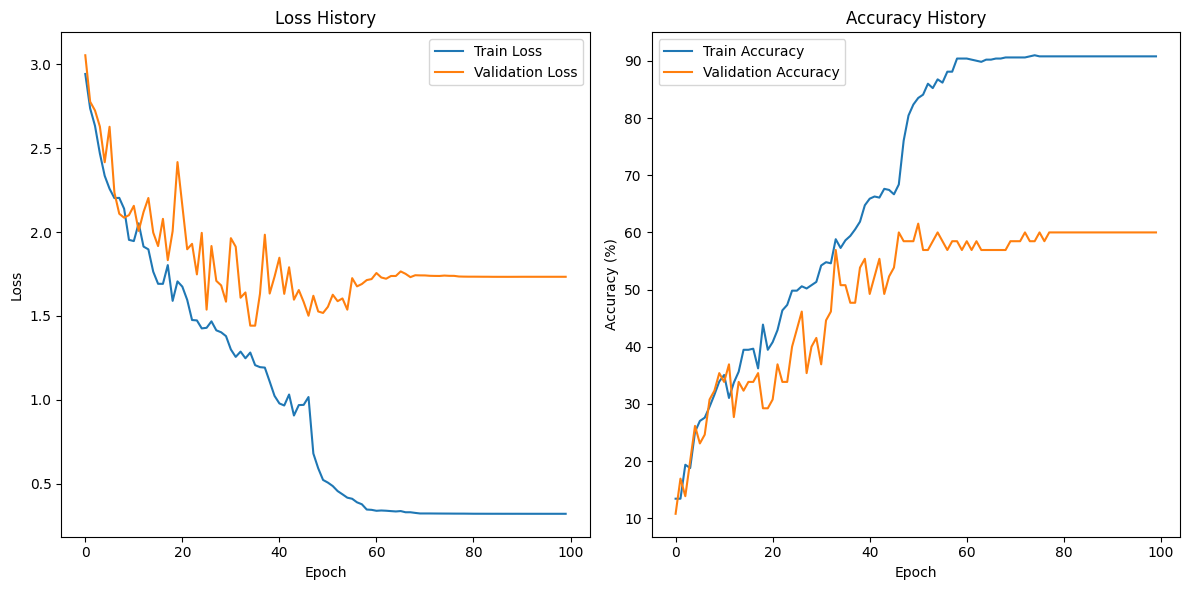

In [ ]:
train_model(lstm_model, train_loader, val_loader, device, num_epochs=100, weight_path="best_lstm_weight.pth", mode=mode)

In [ ]:
test_model(lstm_model, test_loader, device, weight_path="best_lstm_weight.pth", mode=mode)

------------Testing on the best weight------------
Test Loss: 0.9147, Test Acc: 66.15%
F1 Score: 0.6805, Precision: 0.7403, Recall: 0.6615
Confusion Matrix:
 [[5 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 3 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

# Testing_VL: LSTM

In [ ]:
# Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
list_data_dir_test = '/content/drive/MyDrive/DrAIgon/list_data_tvl'
num_classes = 22
input_size = 34
hidden_size = 128
num_layers = 3
mode = 1

In [ ]:
dataset_test = GymPoseDataset(list_data_dir_test, transform=transforms.ToTensor())
test_loader_t = create_test_dataloader(dataset_test)
lstm_model = LSTMGymModel(input_size, hidden_size, num_layers, num_classes).to(device)

In [ ]:
test_model(lstm_model, test_loader_t, device, weight_path="best_lstm_weight.pth", mode=mode)

------------Testing on the best weight------------
Test Loss: 3.0292, Test Acc: 25.64%
F1 Score: 0.2165, Precision: 0.2167, Recall: 0.2564
Confusion Matrix:
 [[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0

# Training: Bi-directional LSTM

In [ ]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class BiLSTMGymModel(nn.Module):
    def __init__(self, input_size=34, hidden_size=128, num_layers=2, num_classes=22):
        super(BiLSTMGymModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x, x_lens):
        packed_x = pack_padded_sequence(x, x_lens.cpu(), batch_first=True, enforce_sorted=False)
        packed_out, (hn, cn) = self.lstm(packed_x)
        out = self.fc(torch.cat((hn[-2, :, :], hn[-1, :, :]), dim=1))
        return out

In [ ]:
# Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
list_data_dir = '/content/drive/MyDrive/DrAIgon/list_data_vl'
num_classes = 22
input_size = 34
hidden_size = 128
num_layers = 3
mode = 1

In [ ]:
dataset = GymPoseDataset(list_data_dir, transform=transforms.ToTensor(), augment=False)
train_loader, val_loader, test_loader = create_dataloaders(dataset)
bilstm_model = BiLSTMGymModel(input_size, hidden_size, num_layers, num_classes).to(device)

In [ ]:
print(bilstm_model)

num_params = sum(p.numel() for p in bilstm_model.parameters() if p.requires_grad)
print(f"Số lượng tham số của mô hình: {num_params}")

Epoch 1/100: 100%|██████████| 131/131 [00:03<00:00, 38.61it/s]


Epoch 1/100, Train Loss: 2.8526, Train Acc: 16.48%, Val Loss: 2.7784, Val Acc: 13.85%


Epoch 2/100: 100%|██████████| 131/131 [00:03<00:00, 38.50it/s]


Epoch 2/100, Train Loss: 2.4246, Train Acc: 27.39%, Val Loss: 2.3366, Val Acc: 26.15%


Epoch 3/100: 100%|██████████| 131/131 [00:03<00:00, 40.24it/s]


Epoch 3/100, Train Loss: 2.1085, Train Acc: 35.25%, Val Loss: 2.1979, Val Acc: 29.23%


Epoch 4/100: 100%|██████████| 131/131 [00:03<00:00, 39.88it/s]


Epoch 4/100, Train Loss: 1.9460, Train Acc: 35.63%, Val Loss: 1.9348, Val Acc: 40.00%


Epoch 5/100: 100%|██████████| 131/131 [00:03<00:00, 39.33it/s]


Epoch 5/100, Train Loss: 1.8303, Train Acc: 39.85%, Val Loss: 2.0618, Val Acc: 33.85%


Epoch 6/100: 100%|██████████| 131/131 [00:03<00:00, 38.89it/s]


Epoch 6/100, Train Loss: 1.6868, Train Acc: 43.68%, Val Loss: 2.0410, Val Acc: 38.46%


Epoch 7/100: 100%|██████████| 131/131 [00:03<00:00, 40.45it/s]


Epoch 7/100, Train Loss: 1.6889, Train Acc: 44.64%, Val Loss: 1.8524, Val Acc: 36.92%


Epoch 8/100: 100%|██████████| 131/131 [00:03<00:00, 41.18it/s]


Epoch 8/100, Train Loss: 1.5613, Train Acc: 47.51%, Val Loss: 1.8556, Val Acc: 36.92%


Epoch 9/100: 100%|██████████| 131/131 [00:03<00:00, 40.09it/s]


Epoch 9/100, Train Loss: 1.4499, Train Acc: 51.34%, Val Loss: 1.8495, Val Acc: 35.38%


Epoch 10/100: 100%|██████████| 131/131 [00:03<00:00, 39.66it/s]


Epoch 10/100, Train Loss: 1.5157, Train Acc: 47.89%, Val Loss: 1.8346, Val Acc: 33.85%


Epoch 11/100: 100%|██████████| 131/131 [00:03<00:00, 40.89it/s]


Epoch 11/100, Train Loss: 1.4793, Train Acc: 50.38%, Val Loss: 1.8215, Val Acc: 35.38%


Epoch 12/100: 100%|██████████| 131/131 [00:03<00:00, 41.41it/s]


Epoch 12/100, Train Loss: 1.4256, Train Acc: 52.49%, Val Loss: 1.7083, Val Acc: 41.54%


Epoch 13/100: 100%|██████████| 131/131 [00:03<00:00, 40.47it/s]


Epoch 13/100, Train Loss: 1.3070, Train Acc: 54.41%, Val Loss: 1.9406, Val Acc: 36.92%


Epoch 14/100: 100%|██████████| 131/131 [00:03<00:00, 41.24it/s]


Epoch 14/100, Train Loss: 1.2989, Train Acc: 56.70%, Val Loss: 1.8293, Val Acc: 43.08%


Epoch 15/100: 100%|██████████| 131/131 [00:03<00:00, 41.07it/s]


Epoch 15/100, Train Loss: 1.2079, Train Acc: 58.81%, Val Loss: 1.8940, Val Acc: 41.54%


Epoch 16/100: 100%|██████████| 131/131 [00:03<00:00, 40.67it/s]


Epoch 16/100, Train Loss: 1.1964, Train Acc: 59.20%, Val Loss: 2.0129, Val Acc: 38.46%


Epoch 17/100: 100%|██████████| 131/131 [00:03<00:00, 40.03it/s]


Epoch 17/100, Train Loss: 1.1833, Train Acc: 57.47%, Val Loss: 1.8556, Val Acc: 44.62%


Epoch 18/100: 100%|██████████| 131/131 [00:03<00:00, 40.25it/s]


Epoch 18/100, Train Loss: 1.1145, Train Acc: 62.07%, Val Loss: 1.7935, Val Acc: 43.08%


Epoch 19/100: 100%|██████████| 131/131 [00:03<00:00, 41.31it/s]


Epoch 19/100, Train Loss: 1.0375, Train Acc: 62.45%, Val Loss: 1.8351, Val Acc: 38.46%


Epoch 20/100: 100%|██████████| 131/131 [00:03<00:00, 40.51it/s]


Epoch 20/100, Train Loss: 0.9958, Train Acc: 65.90%, Val Loss: 1.8090, Val Acc: 43.08%


Epoch 21/100: 100%|██████████| 131/131 [00:03<00:00, 41.80it/s]


Epoch 21/100, Train Loss: 1.0079, Train Acc: 64.75%, Val Loss: 1.8067, Val Acc: 49.23%


Epoch 22/100: 100%|██████████| 131/131 [00:03<00:00, 41.77it/s]


Epoch 22/100, Train Loss: 0.9535, Train Acc: 66.86%, Val Loss: 1.8158, Val Acc: 47.69%


Epoch 23/100: 100%|██████████| 131/131 [00:03<00:00, 41.04it/s]


Epoch 23/100, Train Loss: 1.0441, Train Acc: 66.09%, Val Loss: 1.7602, Val Acc: 46.15%


Epoch 24/100: 100%|██████████| 131/131 [00:03<00:00, 40.28it/s]


Epoch 24/100, Train Loss: 0.6764, Train Acc: 77.20%, Val Loss: 1.6205, Val Acc: 49.23%


Epoch 25/100: 100%|██████████| 131/131 [00:03<00:00, 41.17it/s]


Epoch 25/100, Train Loss: 0.5858, Train Acc: 80.46%, Val Loss: 1.6523, Val Acc: 52.31%


Epoch 26/100: 100%|██████████| 131/131 [00:03<00:00, 41.21it/s]


Epoch 26/100, Train Loss: 0.5328, Train Acc: 81.80%, Val Loss: 1.6043, Val Acc: 52.31%


Epoch 27/100: 100%|██████████| 131/131 [00:03<00:00, 39.19it/s]


Epoch 27/100, Train Loss: 0.5019, Train Acc: 83.91%, Val Loss: 1.7392, Val Acc: 47.69%


Epoch 28/100: 100%|██████████| 131/131 [00:03<00:00, 41.12it/s]


Epoch 28/100, Train Loss: 0.4861, Train Acc: 83.52%, Val Loss: 1.6992, Val Acc: 44.62%


Epoch 29/100: 100%|██████████| 131/131 [00:03<00:00, 40.99it/s]


Epoch 29/100, Train Loss: 0.4418, Train Acc: 85.25%, Val Loss: 1.6644, Val Acc: 49.23%


Epoch 30/100: 100%|██████████| 131/131 [00:03<00:00, 40.30it/s]


Epoch 30/100, Train Loss: 0.4195, Train Acc: 86.78%, Val Loss: 1.7223, Val Acc: 47.69%


Epoch 31/100: 100%|██████████| 131/131 [00:03<00:00, 41.03it/s]


Epoch 31/100, Train Loss: 0.4103, Train Acc: 86.21%, Val Loss: 1.7204, Val Acc: 50.77%


Epoch 32/100: 100%|██████████| 131/131 [00:03<00:00, 41.35it/s]


Epoch 32/100, Train Loss: 0.3820, Train Acc: 86.97%, Val Loss: 1.7714, Val Acc: 47.69%


Epoch 33/100: 100%|██████████| 131/131 [00:03<00:00, 41.22it/s]


Epoch 33/100, Train Loss: 0.3634, Train Acc: 87.55%, Val Loss: 1.7525, Val Acc: 49.23%


Epoch 34/100: 100%|██████████| 131/131 [00:03<00:00, 40.07it/s]


Epoch 34/100, Train Loss: 0.3516, Train Acc: 88.31%, Val Loss: 1.7991, Val Acc: 49.23%


Epoch 35/100: 100%|██████████| 131/131 [00:03<00:00, 42.42it/s]


Epoch 35/100, Train Loss: 0.3289, Train Acc: 89.08%, Val Loss: 1.7472, Val Acc: 49.23%


Epoch 36/100: 100%|██████████| 131/131 [00:03<00:00, 40.91it/s]


Epoch 36/100, Train Loss: 0.3159, Train Acc: 90.23%, Val Loss: 1.7871, Val Acc: 50.77%


Epoch 37/100: 100%|██████████| 131/131 [00:03<00:00, 40.48it/s]


Epoch 37/100, Train Loss: 0.3072, Train Acc: 88.89%, Val Loss: 1.7947, Val Acc: 47.69%


Epoch 38/100: 100%|██████████| 131/131 [00:03<00:00, 41.53it/s]


Epoch 38/100, Train Loss: 0.2746, Train Acc: 90.61%, Val Loss: 1.8036, Val Acc: 49.23%


Epoch 39/100: 100%|██████████| 131/131 [00:03<00:00, 42.03it/s]


Epoch 39/100, Train Loss: 0.2653, Train Acc: 91.19%, Val Loss: 1.8204, Val Acc: 49.23%


Epoch 40/100: 100%|██████████| 131/131 [00:03<00:00, 41.22it/s]


Epoch 40/100, Train Loss: 0.2614, Train Acc: 91.57%, Val Loss: 1.7998, Val Acc: 49.23%


Epoch 41/100: 100%|██████████| 131/131 [00:03<00:00, 40.04it/s]


Epoch 41/100, Train Loss: 0.2592, Train Acc: 91.00%, Val Loss: 1.7977, Val Acc: 50.77%


Epoch 42/100: 100%|██████████| 131/131 [00:03<00:00, 41.88it/s]


Epoch 42/100, Train Loss: 0.2551, Train Acc: 91.38%, Val Loss: 1.7964, Val Acc: 52.31%


Epoch 43/100: 100%|██████████| 131/131 [00:03<00:00, 41.43it/s]


Epoch 43/100, Train Loss: 0.2536, Train Acc: 91.38%, Val Loss: 1.7945, Val Acc: 50.77%


Epoch 44/100: 100%|██████████| 131/131 [00:03<00:00, 39.79it/s]


Epoch 44/100, Train Loss: 0.2516, Train Acc: 91.57%, Val Loss: 1.7881, Val Acc: 50.77%


Epoch 45/100: 100%|██████████| 131/131 [00:03<00:00, 41.48it/s]


Epoch 45/100, Train Loss: 0.2487, Train Acc: 91.57%, Val Loss: 1.8064, Val Acc: 50.77%


Epoch 46/100: 100%|██████████| 131/131 [00:03<00:00, 40.95it/s]


Epoch 46/100, Train Loss: 0.2469, Train Acc: 91.38%, Val Loss: 1.8001, Val Acc: 50.77%


Epoch 47/100: 100%|██████████| 131/131 [00:03<00:00, 39.73it/s]


Epoch 47/100, Train Loss: 0.2451, Train Acc: 91.95%, Val Loss: 1.8200, Val Acc: 50.77%


Epoch 48/100: 100%|██████████| 131/131 [00:03<00:00, 40.84it/s]


Epoch 48/100, Train Loss: 0.2424, Train Acc: 92.15%, Val Loss: 1.8037, Val Acc: 52.31%


Epoch 49/100: 100%|██████████| 131/131 [00:03<00:00, 41.38it/s]


Epoch 49/100, Train Loss: 0.2389, Train Acc: 91.95%, Val Loss: 1.8036, Val Acc: 52.31%


Epoch 50/100: 100%|██████████| 131/131 [00:03<00:00, 40.37it/s]


Epoch 50/100, Train Loss: 0.2384, Train Acc: 91.95%, Val Loss: 1.8037, Val Acc: 52.31%


Epoch 51/100: 100%|██████████| 131/131 [00:03<00:00, 40.37it/s]


Epoch 51/100, Train Loss: 0.2382, Train Acc: 91.95%, Val Loss: 1.8034, Val Acc: 52.31%


Epoch 52/100: 100%|██████████| 131/131 [00:03<00:00, 41.42it/s]


Epoch 52/100, Train Loss: 0.2379, Train Acc: 91.95%, Val Loss: 1.8047, Val Acc: 52.31%


Epoch 53/100: 100%|██████████| 131/131 [00:03<00:00, 40.01it/s]


Epoch 53/100, Train Loss: 0.2377, Train Acc: 91.95%, Val Loss: 1.8036, Val Acc: 52.31%


Epoch 54/100: 100%|██████████| 131/131 [00:03<00:00, 39.69it/s]


Epoch 54/100, Train Loss: 0.2373, Train Acc: 91.95%, Val Loss: 1.8038, Val Acc: 52.31%


Epoch 55/100: 100%|██████████| 131/131 [00:03<00:00, 41.17it/s]


Epoch 55/100, Train Loss: 0.2368, Train Acc: 91.95%, Val Loss: 1.8044, Val Acc: 53.85%


Epoch 56/100: 100%|██████████| 131/131 [00:03<00:00, 41.50it/s]


Epoch 56/100, Train Loss: 0.2367, Train Acc: 91.95%, Val Loss: 1.8032, Val Acc: 53.85%


Epoch 57/100: 100%|██████████| 131/131 [00:03<00:00, 40.74it/s]


Epoch 57/100, Train Loss: 0.2363, Train Acc: 91.95%, Val Loss: 1.8049, Val Acc: 53.85%


Epoch 58/100: 100%|██████████| 131/131 [00:03<00:00, 40.03it/s]


Epoch 58/100, Train Loss: 0.2362, Train Acc: 91.95%, Val Loss: 1.8069, Val Acc: 53.85%


Epoch 59/100: 100%|██████████| 131/131 [00:03<00:00, 41.45it/s]


Epoch 59/100, Train Loss: 0.2359, Train Acc: 91.95%, Val Loss: 1.8083, Val Acc: 53.85%


Epoch 60/100: 100%|██████████| 131/131 [00:03<00:00, 41.34it/s]


Epoch 60/100, Train Loss: 0.2356, Train Acc: 91.95%, Val Loss: 1.8081, Val Acc: 53.85%


Epoch 61/100: 100%|██████████| 131/131 [00:03<00:00, 40.12it/s]


Epoch 61/100, Train Loss: 0.2355, Train Acc: 91.95%, Val Loss: 1.8082, Val Acc: 53.85%


Epoch 62/100: 100%|██████████| 131/131 [00:03<00:00, 41.27it/s]


Epoch 62/100, Train Loss: 0.2355, Train Acc: 91.95%, Val Loss: 1.8081, Val Acc: 53.85%


Epoch 63/100: 100%|██████████| 131/131 [00:03<00:00, 41.05it/s]


Epoch 63/100, Train Loss: 0.2355, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 64/100: 100%|██████████| 131/131 [00:03<00:00, 40.83it/s]


Epoch 64/100, Train Loss: 0.2355, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 65/100: 100%|██████████| 131/131 [00:03<00:00, 40.58it/s]


Epoch 65/100, Train Loss: 0.2354, Train Acc: 91.95%, Val Loss: 1.8083, Val Acc: 53.85%


Epoch 66/100: 100%|██████████| 131/131 [00:03<00:00, 40.61it/s]


Epoch 66/100, Train Loss: 0.2354, Train Acc: 91.95%, Val Loss: 1.8083, Val Acc: 53.85%


Epoch 67/100: 100%|██████████| 131/131 [00:03<00:00, 38.63it/s]


Epoch 67/100, Train Loss: 0.2354, Train Acc: 91.95%, Val Loss: 1.8081, Val Acc: 53.85%


Epoch 68/100: 100%|██████████| 131/131 [00:03<00:00, 36.58it/s]


Epoch 68/100, Train Loss: 0.2354, Train Acc: 91.95%, Val Loss: 1.8083, Val Acc: 53.85%


Epoch 69/100: 100%|██████████| 131/131 [00:03<00:00, 37.18it/s]


Epoch 69/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8082, Val Acc: 53.85%


Epoch 70/100: 100%|██████████| 131/131 [00:03<00:00, 39.84it/s]


Epoch 70/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 71/100: 100%|██████████| 131/131 [00:03<00:00, 38.29it/s]


Epoch 71/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 72/100: 100%|██████████| 131/131 [00:03<00:00, 41.58it/s]


Epoch 72/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 73/100: 100%|██████████| 131/131 [00:03<00:00, 41.76it/s]


Epoch 73/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 74/100: 100%|██████████| 131/131 [00:03<00:00, 40.76it/s]


Epoch 74/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 75/100: 100%|██████████| 131/131 [00:03<00:00, 40.58it/s]


Epoch 75/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8079, Val Acc: 53.85%


Epoch 76/100: 100%|██████████| 131/131 [00:03<00:00, 40.75it/s]


Epoch 76/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 77/100: 100%|██████████| 131/131 [00:03<00:00, 42.42it/s]


Epoch 77/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 78/100: 100%|██████████| 131/131 [00:03<00:00, 40.96it/s]


Epoch 78/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 79/100: 100%|██████████| 131/131 [00:03<00:00, 36.01it/s]


Epoch 79/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 80/100: 100%|██████████| 131/131 [00:03<00:00, 40.37it/s]


Epoch 80/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 81/100: 100%|██████████| 131/131 [00:03<00:00, 40.44it/s]


Epoch 81/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 82/100: 100%|██████████| 131/131 [00:03<00:00, 39.80it/s]


Epoch 82/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 83/100: 100%|██████████| 131/131 [00:03<00:00, 39.06it/s]


Epoch 83/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 84/100: 100%|██████████| 131/131 [00:03<00:00, 40.94it/s]


Epoch 84/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 85/100: 100%|██████████| 131/131 [00:03<00:00, 40.18it/s]


Epoch 85/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 86/100: 100%|██████████| 131/131 [00:03<00:00, 41.36it/s]


Epoch 86/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 87/100: 100%|██████████| 131/131 [00:03<00:00, 40.72it/s]


Epoch 87/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 88/100: 100%|██████████| 131/131 [00:03<00:00, 39.98it/s]


Epoch 88/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 89/100: 100%|██████████| 131/131 [00:03<00:00, 39.14it/s]


Epoch 89/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 90/100: 100%|██████████| 131/131 [00:03<00:00, 41.24it/s]


Epoch 90/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 91/100: 100%|██████████| 131/131 [00:03<00:00, 39.22it/s]


Epoch 91/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 92/100: 100%|██████████| 131/131 [00:03<00:00, 37.62it/s]


Epoch 92/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 93/100: 100%|██████████| 131/131 [00:03<00:00, 41.16it/s]


Epoch 93/100, Train Loss: 0.2353, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 94/100: 100%|██████████| 131/131 [00:03<00:00, 41.29it/s]


Epoch 94/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 95/100: 100%|██████████| 131/131 [00:03<00:00, 37.20it/s]


Epoch 95/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 96/100: 100%|██████████| 131/131 [00:03<00:00, 40.34it/s]


Epoch 96/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 97/100: 100%|██████████| 131/131 [00:03<00:00, 39.72it/s]


Epoch 97/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 98/100: 100%|██████████| 131/131 [00:03<00:00, 39.54it/s]


Epoch 98/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 99/100: 100%|██████████| 131/131 [00:03<00:00, 41.28it/s]


Epoch 99/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


Epoch 100/100: 100%|██████████| 131/131 [00:03<00:00, 41.94it/s]


Epoch 100/100, Train Loss: 0.2352, Train Acc: 91.95%, Val Loss: 1.8080, Val Acc: 53.85%


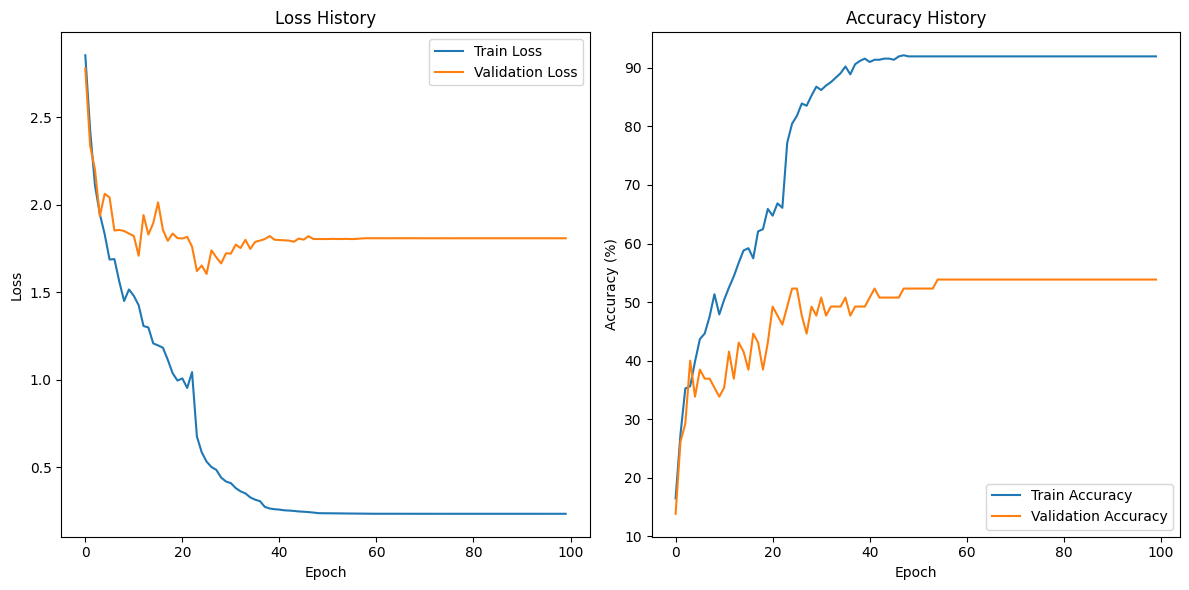

In [ ]:
train_model(bilstm_model, train_loader, val_loader, device, num_epochs=100, weight_path="best_bilstm_weight.pth", mode=mode)

In [ ]:
test_model(bilstm_model, test_loader, device, weight_path="best_bilstm_weight.pth", mode=mode)

------------Testing on the best weight------------
Test Loss: 1.4768, Test Acc: 67.69%
F1 Score: 0.6576, Precision: 0.7587, Recall: 0.6769
Confusion Matrix:
 [[2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 

# Testing_VL: Bi-directional LSTM

In [ ]:
# Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
list_data_dir = '/content/drive/MyDrive/DrAIgon/list_data_vl'
num_classes = 22
input_size = 34
hidden_size = 128
num_layers = 3
mode = 1

In [ ]:
dataset_test = GymPoseDataset(list_data_dir_test, transform=transforms.ToTensor())
test_loader_t = create_test_dataloader(dataset_test)
bilstm_model = BiLSTMGymModel(input_size, hidden_size, num_layers, num_classes).to(device)

In [ ]:
test_model(bilstm_model, test_loader_t, device, weight_path="best_bilstm_weight.pth", mode=mode)

------------Testing on the best weight------------
Test Loss: 3.5983, Test Acc: 25.64%
F1 Score: 0.2134, Precision: 0.2283, Recall: 0.2564
Confusion Matrix:
 [[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0

# Training: ST-GCN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# hop_size = 0 1 2 3
# adj = (17 x 17)

In [ ]:
#edges =  [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 5), (4, 6),
#         (5, 6), (5, 7), (5, 11), (6, 8), (6, 12), (7, 9), (8, 10),
#         (11, 12), (11, 13), (12, 14), (13, 15), (14, 16), (0, 0) ... (16, 16)]



In [ ]:
# A = (17 x 17)

In [ ]:
class Graph():
  def __init__(self, hop_size):
      self.num_node = 17
      self.get_edge()
      self.hop_size = hop_size
      self.hop_dis = self.get_hop_distance(self.num_node, self.edge, hop_size=hop_size)
      self.get_adjacency()

  def __str__(self):
      return self.A

  def get_edge(self):
      self_link = [(i, i) for i in range(self.num_node)]
      neighbor_link = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 5), (4, 6),
                        (5, 6), (5, 7), (5, 11), (6, 8), (6, 12), (7, 9), (8, 10),
                        (11, 12), (11, 13), (12, 14), (13, 15), (14, 16)]
      self.edge = self_link + neighbor_link

  def get_adjacency(self):
      valid_hop = range(0, self.hop_size + 1, 1)
      adjacency = np.zeros((self.num_node, self.num_node))
      for hop in valid_hop:
          adjacency[self.hop_dis == hop] = 1
      normalize_adjacency = self.normalize_digraph(adjacency)
      A = np.zeros((len(valid_hop), self.num_node, self.num_node))
      for i, hop in enumerate(valid_hop):
          A[i][self.hop_dis == hop] = normalize_adjacency[self.hop_dis == hop]
      self.A = A

  def get_hop_distance(self, num_node, edge, hop_size):
      A = np.zeros((num_node, num_node))
      for i, j in edge:
          A[j, i] = 1
          A[i, j] = 1
      hop_dis = np.zeros((num_node, num_node)) + np.inf
      transfer_mat = [np.linalg.matrix_power(A, d) for d in range(hop_size + 1)]
      arrive_mat = (np.stack(transfer_mat) > 0)
      for d in range(hop_size, -1, -1):
          hop_dis[arrive_mat[d]] = d
      return hop_dis

  def normalize_digraph(self, A):
      Dl = np.sum(A, 0)
      num_node = A.shape[0]
      Dn = np.zeros((num_node, num_node))
      for i in range(num_node):
          if Dl[i] > 0:
              Dn[i, i] = Dl[i]**(-1)
      DAD = np.dot(A, Dn)
      return DAD

In [ ]:
class SpatialGraphConvolution(nn.Module):
  def __init__(self, in_channels, out_channels, s_kernel_size):
    super().__init__()
    self.s_kernel_size = s_kernel_size
    self.conv = nn.Conv2d(in_channels=in_channels,
                          out_channels=out_channels * s_kernel_size,
                          kernel_size=1)

  def forward(self, x, A):
    x = self.conv(x)
    n, kc, t, v = x.size()
    x = x.view(n, self.s_kernel_size, kc//self.s_kernel_size, t, v)
    x = torch.einsum('nkctv,kvw->nctw', (x, A))
    return x.contiguous()

In [ ]:
class STGC_block(nn.Module):
  def __init__(self, in_channels, out_channels, stride, t_kernel_size, A_size, dropout=0.5):
    super().__init__()
    self.sgc = SpatialGraphConvolution(in_channels=in_channels,
                                       out_channels=out_channels,
                                       s_kernel_size=A_size[0])

    self.M = nn.Parameter(torch.ones(A_size))

    self.tgc = nn.Sequential(nn.BatchNorm2d(out_channels),
                            nn.ReLU(),
                            nn.Dropout(dropout),
                            nn.Conv2d(out_channels,
                                      out_channels,
                                      (t_kernel_size, 1),
                                      (stride, 1),
                                      ((t_kernel_size - 1) // 2, 0)),
                            nn.BatchNorm2d(out_channels),
                            nn.ReLU())

  def forward(self, x, A):
    x = self.tgc(self.sgc(x, A * self.M))
    return x

In [ ]:
class ST_GCN(nn.Module):
    def __init__(self, num_classes=22, num_joints=17, sequence_length=20, t_kernel_size=9, hop_size=2):
        super().__init__()
        in_channels = 2  # (x,y) not confidences

        graph = Graph(hop_size)
        A = torch.tensor(graph.A, dtype=torch.float32, requires_grad=False)
        self.register_buffer('A', A)

        self.stgc_blocks = nn.ModuleList([
            STGC_block(in_channels, 64, 1, t_kernel_size, A.shape),
            STGC_block(64, 128, 2, t_kernel_size, A.shape),
            STGC_block(128, 256, 2, t_kernel_size, A.shape),
            STGC_block(256, 256, 1, t_kernel_size, A.shape),
            STGC_block(256, 256, 1, t_kernel_size, A.shape)
        ])

        self.fc = nn.Conv2d(256, num_classes, kernel_size=1)

    def forward(self, x):
        N, T, VC = x.size()
        C = 2
        V = VC // C
        x = x.view(N, T, V, C).permute(0, 3, 1, 2)  # [N, C, T, V]

        for stgc in self.stgc_blocks:
            x = stgc(x, self.A)

        x = F.avg_pool2d(x, x.size()[2:])
        x = x.view(N, -1, 1, 1)
        x = self.fc(x)
        x = x.view(x.size(0), -1)
        return x

In [ ]:
# Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
list_data_dir = '/content/drive/MyDrive/DrAIgon/list_data_vl'
mode = 2

In [ ]:
ST_GCN = ST_GCN().to(device)

In [ ]:
dataset = GymPoseDataset(list_data_dir, transform=transforms.ToTensor(), augment=False)
train_loader, val_loader, test_loader = create_dataloaders(dataset)

Epoch 1/100: 100%|██████████| 131/131 [00:03<00:00, 41.66it/s]


Epoch 1/100, Train Loss: 2.9781, Train Acc: 11.88%, Val Loss: 3.1102, Val Acc: 18.46%


Epoch 2/100: 100%|██████████| 131/131 [00:03<00:00, 43.11it/s]


Epoch 2/100, Train Loss: 2.7301, Train Acc: 21.84%, Val Loss: 2.6322, Val Acc: 21.54%


Epoch 3/100: 100%|██████████| 131/131 [00:03<00:00, 43.06it/s]


Epoch 3/100, Train Loss: 2.6277, Train Acc: 21.84%, Val Loss: 2.7441, Val Acc: 26.15%


Epoch 4/100: 100%|██████████| 131/131 [00:02<00:00, 44.23it/s]


Epoch 4/100, Train Loss: 2.5338, Train Acc: 23.37%, Val Loss: 2.4910, Val Acc: 24.62%


Epoch 5/100: 100%|██████████| 131/131 [00:03<00:00, 43.63it/s]


Epoch 5/100, Train Loss: 2.4431, Train Acc: 27.39%, Val Loss: 2.5092, Val Acc: 27.69%


Epoch 6/100: 100%|██████████| 131/131 [00:03<00:00, 42.82it/s]


Epoch 6/100, Train Loss: 2.3724, Train Acc: 25.48%, Val Loss: 2.3353, Val Acc: 23.08%


Epoch 7/100: 100%|██████████| 131/131 [00:02<00:00, 43.86it/s]


Epoch 7/100, Train Loss: 2.3022, Train Acc: 30.46%, Val Loss: 2.2790, Val Acc: 24.62%


Epoch 8/100: 100%|██████████| 131/131 [00:02<00:00, 44.67it/s]


Epoch 8/100, Train Loss: 2.1963, Train Acc: 29.31%, Val Loss: 2.0502, Val Acc: 32.31%


Epoch 9/100: 100%|██████████| 131/131 [00:03<00:00, 41.09it/s]


Epoch 9/100, Train Loss: 2.1541, Train Acc: 30.46%, Val Loss: 2.1677, Val Acc: 30.77%


Epoch 10/100: 100%|██████████| 131/131 [00:03<00:00, 41.74it/s]


Epoch 10/100, Train Loss: 2.0636, Train Acc: 33.33%, Val Loss: 1.7200, Val Acc: 40.00%


Epoch 11/100: 100%|██████████| 131/131 [00:03<00:00, 43.06it/s]


Epoch 11/100, Train Loss: 2.0216, Train Acc: 36.02%, Val Loss: 1.6800, Val Acc: 46.15%


Epoch 12/100: 100%|██████████| 131/131 [00:03<00:00, 43.23it/s]


Epoch 12/100, Train Loss: 1.9668, Train Acc: 33.33%, Val Loss: 1.8575, Val Acc: 32.31%


Epoch 13/100: 100%|██████████| 131/131 [00:03<00:00, 41.27it/s]


Epoch 13/100, Train Loss: 1.8676, Train Acc: 40.23%, Val Loss: 1.6367, Val Acc: 38.46%


Epoch 14/100: 100%|██████████| 131/131 [00:03<00:00, 43.64it/s]


Epoch 14/100, Train Loss: 1.9562, Train Acc: 37.55%, Val Loss: 1.6716, Val Acc: 33.85%


Epoch 15/100: 100%|██████████| 131/131 [00:02<00:00, 43.77it/s]


Epoch 15/100, Train Loss: 1.7736, Train Acc: 40.04%, Val Loss: 1.6850, Val Acc: 41.54%


Epoch 16/100: 100%|██████████| 131/131 [00:02<00:00, 43.79it/s]


Epoch 16/100, Train Loss: 1.8323, Train Acc: 37.36%, Val Loss: 1.4461, Val Acc: 52.31%


Epoch 17/100: 100%|██████████| 131/131 [00:03<00:00, 41.68it/s]


Epoch 17/100, Train Loss: 1.8132, Train Acc: 40.80%, Val Loss: 1.3996, Val Acc: 53.85%


Epoch 18/100: 100%|██████████| 131/131 [00:03<00:00, 42.59it/s]


Epoch 18/100, Train Loss: 1.7872, Train Acc: 45.21%, Val Loss: 1.3946, Val Acc: 49.23%


Epoch 19/100: 100%|██████████| 131/131 [00:03<00:00, 42.79it/s]


Epoch 19/100, Train Loss: 1.6718, Train Acc: 46.17%, Val Loss: 1.4124, Val Acc: 50.77%


Epoch 20/100: 100%|██████████| 131/131 [00:03<00:00, 42.78it/s]


Epoch 20/100, Train Loss: 1.6364, Train Acc: 45.79%, Val Loss: 1.3003, Val Acc: 53.85%


Epoch 21/100: 100%|██████████| 131/131 [00:03<00:00, 42.15it/s]


Epoch 21/100, Train Loss: 1.5181, Train Acc: 49.23%, Val Loss: 1.1055, Val Acc: 64.62%


Epoch 22/100: 100%|██████████| 131/131 [00:03<00:00, 42.39it/s]


Epoch 22/100, Train Loss: 1.5198, Train Acc: 51.92%, Val Loss: 0.9676, Val Acc: 64.62%


Epoch 23/100: 100%|██████████| 131/131 [00:03<00:00, 43.35it/s]


Epoch 23/100, Train Loss: 1.4772, Train Acc: 55.36%, Val Loss: 1.2689, Val Acc: 60.00%


Epoch 24/100: 100%|██████████| 131/131 [00:03<00:00, 41.78it/s]


Epoch 24/100, Train Loss: 1.4622, Train Acc: 53.07%, Val Loss: 1.1279, Val Acc: 60.00%


Epoch 25/100: 100%|██████████| 131/131 [00:03<00:00, 42.41it/s]


Epoch 25/100, Train Loss: 1.4432, Train Acc: 54.79%, Val Loss: 1.1391, Val Acc: 66.15%


Epoch 26/100: 100%|██████████| 131/131 [00:03<00:00, 42.71it/s]


Epoch 26/100, Train Loss: 1.3799, Train Acc: 52.68%, Val Loss: 1.0597, Val Acc: 63.08%


Epoch 27/100: 100%|██████████| 131/131 [00:03<00:00, 42.54it/s]


Epoch 27/100, Train Loss: 1.2555, Train Acc: 59.96%, Val Loss: 1.0724, Val Acc: 58.46%


Epoch 28/100: 100%|██████████| 131/131 [00:03<00:00, 40.99it/s]


Epoch 28/100, Train Loss: 1.2573, Train Acc: 57.47%, Val Loss: 1.0714, Val Acc: 56.92%


Epoch 29/100: 100%|██████████| 131/131 [00:03<00:00, 42.27it/s]


Epoch 29/100, Train Loss: 1.2501, Train Acc: 57.28%, Val Loss: 1.0299, Val Acc: 64.62%


Epoch 30/100: 100%|██████████| 131/131 [00:03<00:00, 42.38it/s]


Epoch 30/100, Train Loss: 1.2130, Train Acc: 59.77%, Val Loss: 0.9254, Val Acc: 66.15%


Epoch 31/100: 100%|██████████| 131/131 [00:03<00:00, 42.21it/s]


Epoch 31/100, Train Loss: 1.1889, Train Acc: 60.15%, Val Loss: 0.8937, Val Acc: 67.69%


Epoch 32/100: 100%|██████████| 131/131 [00:03<00:00, 42.79it/s]


Epoch 32/100, Train Loss: 1.1187, Train Acc: 61.30%, Val Loss: 0.8074, Val Acc: 75.38%


Epoch 33/100: 100%|██████████| 131/131 [00:03<00:00, 42.03it/s]


Epoch 33/100, Train Loss: 1.2137, Train Acc: 60.34%, Val Loss: 1.0439, Val Acc: 66.15%


Epoch 34/100: 100%|██████████| 131/131 [00:03<00:00, 43.23it/s]


Epoch 34/100, Train Loss: 1.1878, Train Acc: 62.64%, Val Loss: 0.6997, Val Acc: 72.31%


Epoch 35/100: 100%|██████████| 131/131 [00:03<00:00, 42.02it/s]


Epoch 35/100, Train Loss: 1.0540, Train Acc: 66.86%, Val Loss: 0.7560, Val Acc: 72.31%


Epoch 36/100: 100%|██████████| 131/131 [00:03<00:00, 43.61it/s]


Epoch 36/100, Train Loss: 1.0646, Train Acc: 66.86%, Val Loss: 0.8913, Val Acc: 69.23%


Epoch 37/100: 100%|██████████| 131/131 [00:03<00:00, 43.08it/s]


Epoch 37/100, Train Loss: 1.1133, Train Acc: 64.18%, Val Loss: 0.7693, Val Acc: 72.31%


Epoch 38/100: 100%|██████████| 131/131 [00:03<00:00, 43.28it/s]


Epoch 38/100, Train Loss: 1.0267, Train Acc: 65.71%, Val Loss: 0.6618, Val Acc: 75.38%


Epoch 39/100: 100%|██████████| 131/131 [00:03<00:00, 43.21it/s]


Epoch 39/100, Train Loss: 0.9840, Train Acc: 68.39%, Val Loss: 0.6027, Val Acc: 80.00%


Epoch 40/100: 100%|██████████| 131/131 [00:03<00:00, 43.28it/s]


Epoch 40/100, Train Loss: 0.9817, Train Acc: 67.43%, Val Loss: 0.7278, Val Acc: 78.46%


Epoch 41/100: 100%|██████████| 131/131 [00:03<00:00, 42.98it/s]


Epoch 41/100, Train Loss: 1.0142, Train Acc: 65.13%, Val Loss: 0.8570, Val Acc: 73.85%


Epoch 42/100: 100%|██████████| 131/131 [00:03<00:00, 41.70it/s]


Epoch 42/100, Train Loss: 0.9094, Train Acc: 71.26%, Val Loss: 0.5820, Val Acc: 78.46%


Epoch 43/100: 100%|██████████| 131/131 [00:03<00:00, 43.29it/s]


Epoch 43/100, Train Loss: 0.9014, Train Acc: 69.92%, Val Loss: 0.6480, Val Acc: 80.00%


Epoch 44/100: 100%|██████████| 131/131 [00:03<00:00, 43.36it/s]


Epoch 44/100, Train Loss: 0.9664, Train Acc: 67.05%, Val Loss: 0.7192, Val Acc: 75.38%


Epoch 45/100: 100%|██████████| 131/131 [00:03<00:00, 42.57it/s]


Epoch 45/100, Train Loss: 0.8681, Train Acc: 71.84%, Val Loss: 0.7741, Val Acc: 73.85%


Epoch 46/100: 100%|██████████| 131/131 [00:03<00:00, 41.77it/s]


Epoch 46/100, Train Loss: 0.8945, Train Acc: 72.22%, Val Loss: 0.8950, Val Acc: 72.31%


Epoch 47/100: 100%|██████████| 131/131 [00:03<00:00, 43.10it/s]


Epoch 47/100, Train Loss: 0.9386, Train Acc: 73.75%, Val Loss: 0.9175, Val Acc: 78.46%


Epoch 48/100: 100%|██████████| 131/131 [00:03<00:00, 43.17it/s]


Epoch 48/100, Train Loss: 0.8451, Train Acc: 72.22%, Val Loss: 0.6206, Val Acc: 76.92%


Epoch 49/100: 100%|██████████| 131/131 [00:03<00:00, 41.96it/s]


Epoch 49/100, Train Loss: 0.7938, Train Acc: 73.75%, Val Loss: 0.7587, Val Acc: 80.00%


Epoch 50/100: 100%|██████████| 131/131 [00:03<00:00, 42.12it/s]


Epoch 50/100, Train Loss: 0.8499, Train Acc: 72.22%, Val Loss: 0.8674, Val Acc: 78.46%


Epoch 51/100: 100%|██████████| 131/131 [00:03<00:00, 42.33it/s]


Epoch 51/100, Train Loss: 0.8257, Train Acc: 73.18%, Val Loss: 0.5238, Val Acc: 80.00%


Epoch 52/100: 100%|██████████| 131/131 [00:03<00:00, 42.05it/s]


Epoch 52/100, Train Loss: 0.8927, Train Acc: 75.10%, Val Loss: 0.5780, Val Acc: 84.62%


Epoch 53/100: 100%|██████████| 131/131 [00:03<00:00, 41.00it/s]


Epoch 53/100, Train Loss: 0.7456, Train Acc: 76.25%, Val Loss: 0.9215, Val Acc: 86.15%


Epoch 54/100: 100%|██████████| 131/131 [00:03<00:00, 43.05it/s]


Epoch 54/100, Train Loss: 0.8431, Train Acc: 74.33%, Val Loss: 0.7253, Val Acc: 80.00%


Epoch 55/100: 100%|██████████| 131/131 [00:03<00:00, 42.81it/s]


Epoch 55/100, Train Loss: 0.7632, Train Acc: 75.67%, Val Loss: 0.7727, Val Acc: 78.46%


Epoch 56/100: 100%|██████████| 131/131 [00:03<00:00, 42.51it/s]


Epoch 56/100, Train Loss: 0.8694, Train Acc: 72.61%, Val Loss: 0.7501, Val Acc: 80.00%


Epoch 57/100: 100%|██████████| 131/131 [00:03<00:00, 41.39it/s]


Epoch 57/100, Train Loss: 0.7787, Train Acc: 76.63%, Val Loss: 0.6824, Val Acc: 81.54%


Epoch 58/100: 100%|██████████| 131/131 [00:03<00:00, 42.90it/s]


Epoch 58/100, Train Loss: 0.7917, Train Acc: 73.56%, Val Loss: 1.1241, Val Acc: 76.92%


Epoch 59/100: 100%|██████████| 131/131 [00:03<00:00, 42.49it/s]


Epoch 59/100, Train Loss: 0.7414, Train Acc: 77.59%, Val Loss: 0.9124, Val Acc: 76.92%


Epoch 60/100: 100%|██████████| 131/131 [00:03<00:00, 42.44it/s]


Epoch 60/100, Train Loss: 0.7911, Train Acc: 74.33%, Val Loss: 1.0851, Val Acc: 76.92%


Epoch 61/100: 100%|██████████| 131/131 [00:03<00:00, 43.61it/s]


Epoch 61/100, Train Loss: 0.6868, Train Acc: 78.93%, Val Loss: 0.7942, Val Acc: 76.92%


Epoch 62/100: 100%|██████████| 131/131 [00:03<00:00, 43.26it/s]


Epoch 62/100, Train Loss: 0.7252, Train Acc: 77.78%, Val Loss: 0.8357, Val Acc: 80.00%


Epoch 63/100: 100%|██████████| 131/131 [00:03<00:00, 43.22it/s]


Epoch 63/100, Train Loss: 0.5350, Train Acc: 82.57%, Val Loss: 0.7027, Val Acc: 83.08%


Epoch 64/100: 100%|██████████| 131/131 [00:03<00:00, 42.65it/s]


Epoch 64/100, Train Loss: 0.5664, Train Acc: 83.91%, Val Loss: 0.7234, Val Acc: 83.08%


Epoch 65/100: 100%|██████████| 131/131 [00:03<00:00, 42.86it/s]


Epoch 65/100, Train Loss: 0.5020, Train Acc: 84.48%, Val Loss: 0.7064, Val Acc: 83.08%


Epoch 66/100: 100%|██████████| 131/131 [00:03<00:00, 42.02it/s]


Epoch 66/100, Train Loss: 0.5523, Train Acc: 82.95%, Val Loss: 0.5862, Val Acc: 83.08%


Epoch 67/100: 100%|██████████| 131/131 [00:03<00:00, 42.91it/s]


Epoch 67/100, Train Loss: 0.4397, Train Acc: 85.63%, Val Loss: 0.5027, Val Acc: 87.69%


Epoch 68/100: 100%|██████████| 131/131 [00:03<00:00, 42.61it/s]


Epoch 68/100, Train Loss: 0.4633, Train Acc: 85.44%, Val Loss: 0.5749, Val Acc: 87.69%


Epoch 69/100: 100%|██████████| 131/131 [00:03<00:00, 43.57it/s]


Epoch 69/100, Train Loss: 0.4486, Train Acc: 87.16%, Val Loss: 0.6717, Val Acc: 86.15%


Epoch 70/100: 100%|██████████| 131/131 [00:03<00:00, 42.58it/s]


Epoch 70/100, Train Loss: 0.4472, Train Acc: 87.16%, Val Loss: 0.6918, Val Acc: 86.15%


Epoch 71/100: 100%|██████████| 131/131 [00:03<00:00, 42.14it/s]


Epoch 71/100, Train Loss: 0.3956, Train Acc: 87.16%, Val Loss: 0.7985, Val Acc: 86.15%


Epoch 72/100: 100%|██████████| 131/131 [00:02<00:00, 43.73it/s]


Epoch 72/100, Train Loss: 0.4755, Train Acc: 85.44%, Val Loss: 0.6235, Val Acc: 84.62%


Epoch 73/100: 100%|██████████| 131/131 [00:03<00:00, 42.73it/s]


Epoch 73/100, Train Loss: 0.3676, Train Acc: 88.51%, Val Loss: 0.5352, Val Acc: 89.23%


Epoch 74/100: 100%|██████████| 131/131 [00:03<00:00, 41.86it/s]


Epoch 74/100, Train Loss: 0.3927, Train Acc: 87.36%, Val Loss: 0.6043, Val Acc: 87.69%


Epoch 75/100: 100%|██████████| 131/131 [00:03<00:00, 42.58it/s]


Epoch 75/100, Train Loss: 0.4477, Train Acc: 86.40%, Val Loss: 0.5697, Val Acc: 86.15%


Epoch 76/100: 100%|██████████| 131/131 [00:02<00:00, 43.76it/s]


Epoch 76/100, Train Loss: 0.4345, Train Acc: 86.21%, Val Loss: 0.5821, Val Acc: 86.15%


Epoch 77/100: 100%|██████████| 131/131 [00:03<00:00, 43.40it/s]


Epoch 77/100, Train Loss: 0.4133, Train Acc: 86.40%, Val Loss: 0.6543, Val Acc: 86.15%


Epoch 78/100: 100%|██████████| 131/131 [00:03<00:00, 42.01it/s]


Epoch 78/100, Train Loss: 0.4163, Train Acc: 87.16%, Val Loss: 0.6583, Val Acc: 84.62%


Epoch 79/100: 100%|██████████| 131/131 [00:03<00:00, 43.14it/s]


Epoch 79/100, Train Loss: 0.3781, Train Acc: 87.55%, Val Loss: 0.7151, Val Acc: 84.62%


Epoch 80/100: 100%|██████████| 131/131 [00:03<00:00, 42.82it/s]


Epoch 80/100, Train Loss: 0.4091, Train Acc: 87.55%, Val Loss: 0.6403, Val Acc: 86.15%


Epoch 81/100: 100%|██████████| 131/131 [00:03<00:00, 43.01it/s]


Epoch 81/100, Train Loss: 0.3515, Train Acc: 87.74%, Val Loss: 0.5777, Val Acc: 86.15%


Epoch 82/100: 100%|██████████| 131/131 [00:03<00:00, 41.59it/s]


Epoch 82/100, Train Loss: 0.3577, Train Acc: 88.89%, Val Loss: 0.7095, Val Acc: 86.15%


Epoch 83/100: 100%|██████████| 131/131 [00:03<00:00, 43.35it/s]


Epoch 83/100, Train Loss: 0.3765, Train Acc: 88.12%, Val Loss: 0.5829, Val Acc: 86.15%


Epoch 84/100: 100%|██████████| 131/131 [00:03<00:00, 42.61it/s]


Epoch 84/100, Train Loss: 0.4032, Train Acc: 87.36%, Val Loss: 0.6336, Val Acc: 87.69%


Epoch 85/100: 100%|██████████| 131/131 [00:03<00:00, 42.91it/s]


Epoch 85/100, Train Loss: 0.4062, Train Acc: 86.97%, Val Loss: 0.5792, Val Acc: 84.62%


Epoch 86/100: 100%|██████████| 131/131 [00:03<00:00, 43.09it/s]


Epoch 86/100, Train Loss: 0.4053, Train Acc: 88.51%, Val Loss: 0.6654, Val Acc: 87.69%


Epoch 87/100: 100%|██████████| 131/131 [00:03<00:00, 43.33it/s]


Epoch 87/100, Train Loss: 0.3791, Train Acc: 88.70%, Val Loss: 0.6686, Val Acc: 87.69%


Epoch 88/100: 100%|██████████| 131/131 [00:03<00:00, 42.84it/s]


Epoch 88/100, Train Loss: 0.3855, Train Acc: 86.97%, Val Loss: 0.6196, Val Acc: 86.15%


Epoch 89/100: 100%|██████████| 131/131 [00:03<00:00, 42.13it/s]


Epoch 89/100, Train Loss: 0.4073, Train Acc: 86.78%, Val Loss: 0.6801, Val Acc: 86.15%


Epoch 90/100: 100%|██████████| 131/131 [00:03<00:00, 42.53it/s]


Epoch 90/100, Train Loss: 0.3820, Train Acc: 88.51%, Val Loss: 0.7511, Val Acc: 87.69%


Epoch 91/100: 100%|██████████| 131/131 [00:03<00:00, 43.06it/s]


Epoch 91/100, Train Loss: 0.3386, Train Acc: 88.89%, Val Loss: 0.5703, Val Acc: 87.69%


Epoch 92/100: 100%|██████████| 131/131 [00:03<00:00, 43.44it/s]


Epoch 92/100, Train Loss: 0.3477, Train Acc: 88.89%, Val Loss: 0.6126, Val Acc: 86.15%


Epoch 93/100: 100%|██████████| 131/131 [00:03<00:00, 41.55it/s]


Epoch 93/100, Train Loss: 0.3637, Train Acc: 88.31%, Val Loss: 0.6096, Val Acc: 86.15%


Epoch 94/100: 100%|██████████| 131/131 [00:03<00:00, 43.62it/s]


Epoch 94/100, Train Loss: 0.3354, Train Acc: 88.89%, Val Loss: 0.6945, Val Acc: 87.69%


Epoch 95/100: 100%|██████████| 131/131 [00:03<00:00, 43.57it/s]


Epoch 95/100, Train Loss: 0.3481, Train Acc: 89.08%, Val Loss: 0.6622, Val Acc: 87.69%


Epoch 96/100: 100%|██████████| 131/131 [00:02<00:00, 43.68it/s]


Epoch 96/100, Train Loss: 0.3947, Train Acc: 86.40%, Val Loss: 0.7051, Val Acc: 84.62%


Epoch 97/100: 100%|██████████| 131/131 [00:03<00:00, 42.97it/s]


Epoch 97/100, Train Loss: 0.4232, Train Acc: 87.93%, Val Loss: 0.6734, Val Acc: 84.62%


Epoch 98/100: 100%|██████████| 131/131 [00:03<00:00, 42.58it/s]


Epoch 98/100, Train Loss: 0.4003, Train Acc: 87.16%, Val Loss: 0.5343, Val Acc: 87.69%


Epoch 99/100: 100%|██████████| 131/131 [00:03<00:00, 43.31it/s]


Epoch 99/100, Train Loss: 0.3838, Train Acc: 88.70%, Val Loss: 0.6459, Val Acc: 87.69%


Epoch 100/100: 100%|██████████| 131/131 [00:03<00:00, 42.96it/s]


Epoch 100/100, Train Loss: 0.3634, Train Acc: 88.51%, Val Loss: 0.6490, Val Acc: 84.62%


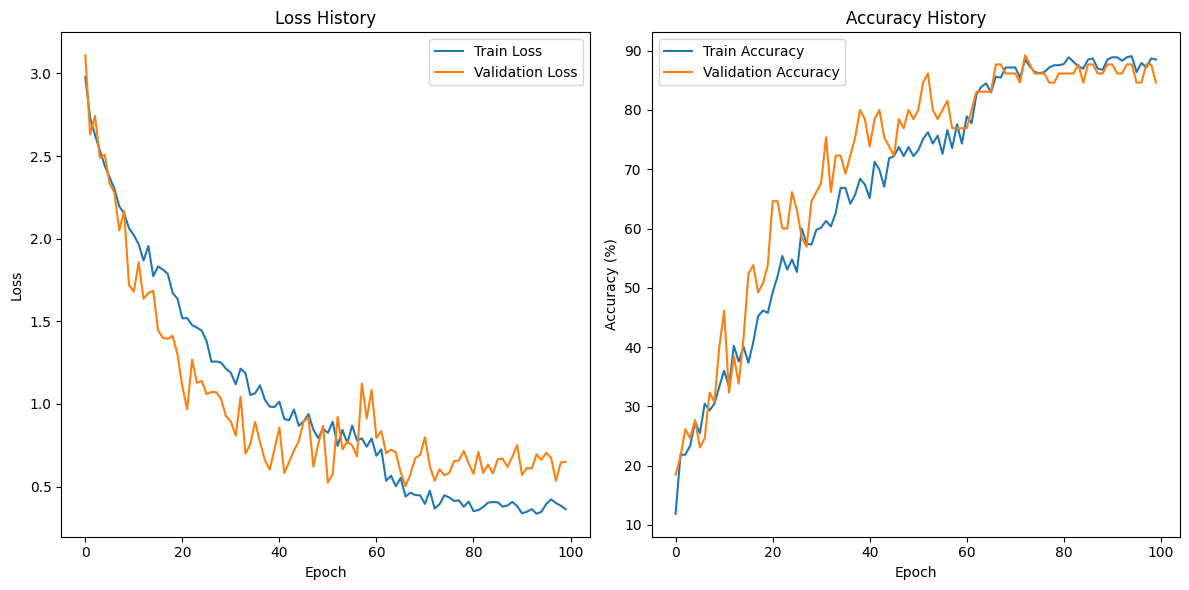

In [ ]:
train_model(ST_GCN, train_loader, val_loader, device, num_epochs=100, mode=mode)

In [ ]:
test_model(ST_GCN, test_loader, device, mode=mode)

------------Testing on the best weight------------
Test Loss: 1.1094, Test Acc: 76.92%
F1 Score: 0.7324, Precision: 0.7313, Recall: 0.7692
Confusion Matrix:
 [[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0

# Testing_VL: ST-GCN

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dir_test = '/content/drive/MyDrive/DrAIgon/AI4LIFE2024-DATA/Test - Vòng loại - 2'
list_data_dir_test = '/content/drive/MyDrive/DrAIgon/list_data_tvl'
mode = 2

In [ ]:
dataset_test = GymPoseDataset(list_data_dir_test, transform=transforms.ToTensor(), augment=False)
test_loader_t = create_test_dataloader(dataset_test)

In [ ]:
test_model(ST_GCN, test_loader_t, device, mode=mode)

------------Testing on the best weight------------
Test Loss: 2.7090, Test Acc: 51.28%
F1 Score: 0.4844, Precision: 0.5192, Recall: 0.5128
Confusion Matrix:
 [[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
test_model(ST_GCN, test_loader_t, device, weight_path='/content/drive/MyDrive/DrAIgon/final_best_weight.pth', mode=mode)

------------Testing on the best weight------------
Test Loss: 2.7090, Test Acc: 51.28%
F1 Score: 0.4844, Precision: 0.5192, Recall: 0.5128
Confusion Matrix:
 [[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0

# Training: ST-GATs

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GraphAttentionLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout, alpha):
        super(GraphAttentionLayer, self).__init__()
        self.dropout = dropout
        self.in_features = in_features
        self.out_features = out_features
        self.alpha = alpha

        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        self.a = nn.Parameter(torch.zeros(size=(2 * out_features, 1)))
        nn.init.xavier_uniform_(self.a.data, gain=1.414)

        self.leakyrelu = nn.LeakyReLU(self.alpha)

    def forward(self, input, adj):
        # input shape: [batch_size, num_nodes, in_features]
        # adj shape: [batch_size, num_nodes, num_nodes]
        Wh = torch.matmul(input, self.W)  # [batch_size, num_nodes, out_features]
        a_input = self._prepare_attentional_mechanism_input(Wh)
        e = self.leakyrelu(torch.matmul(a_input, self.a).squeeze(3))

        zero_vec = -9e15*torch.ones_like(e)
        attention = torch.where(adj > 0, e, zero_vec)
        attention = F.softmax(attention, dim=2)
        attention = F.dropout(attention, self.dropout, training=self.training)
        h_prime = torch.matmul(attention, Wh)

        return F.elu(h_prime)

    def _prepare_attentional_mechanism_input(self, Wh):
        # Wh shape: [batch_size, num_nodes, out_features]
        # This function computes a_input in shape [batch_size, num_nodes, num_nodes, 2 * out_features]
        batch_size, num_nodes, out_features = Wh.size()
        Wh_repeated_in_chunks = Wh.repeat_interleave(num_nodes, dim=1)
        Wh_repeated_alternating = Wh.repeat(1, num_nodes, 1)
        all_combinations_matrix = torch.cat([Wh_repeated_in_chunks, Wh_repeated_alternating], dim=2)
        return all_combinations_matrix.view(batch_size, num_nodes, num_nodes, 2 * out_features)


In [ ]:
class STGAT_block(nn.Module):
    def __init__(self, in_channels, out_channels, A_size, dropout=0.5, alpha=0.2):
        super(STGAT_block, self).__init__()
        self.sga = GraphAttentionLayer(in_channels, out_channels, dropout=dropout, alpha=alpha)
        self.tgc = nn.Sequential(nn.BatchNorm2d(out_channels),
                                 nn.ReLU(),
                                 nn.Dropout(dropout),
                                 nn.Conv2d(out_channels,
                                           out_channels,
                                           kernel_size=(1, 1)),
                                 nn.BatchNorm2d(out_channels),
                                 nn.ReLU())

    def forward(self, x, A):
        N, C, T, V = x.size()
        x = x.view(N * T, V, C)
        x = self.sga(x, A)
        x = x.view(N, C, T, V)
        x = self.tgc(x)
        return x

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ST_GAT(nn.Module):
    def __init__(self, num_classes=22, num_joints=17, sequence_length=20, dropout=0.5, alpha=0.2, hop_size=2):
        super(ST_GAT, self).__init__()

        graph = Graph(hop_size=hop_size)
        A = torch.tensor(graph.A, dtype=torch.float32, requires_grad=False)
        self.register_buffer('A', A)

        self.stgat_blocks = nn.ModuleList([
            STGAT_block(2, 64, A.shape, dropout=dropout, alpha=alpha),
            STGAT_block(64, 128, A.shape, dropout=dropout, alpha=alpha),
            STGAT_block(128, 256, A.shape, dropout=dropout, alpha=alpha)
        ])

        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        N, T, VC = x.size()
        C = 2
        V = VC // C
        x = x.view(N, C, T, V)

        for block in self.stgat_blocks:
            x = block(x, self.A)

        x = F.avg_pool2d(x, x.size()[2:])
        x = x.view(N, -1)
        x = self.fc(x)
        return x

In [ ]:
class GraphAttentionLayer(nn.Module):
    def __init__(self, in_features, out_features, dropout, alpha):
        super(GraphAttentionLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.alpha = alpha

        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        self.a = nn.Parameter(torch.zeros(size=(2*out_features, 1)))
        nn.init.xavier_uniform_(self.a.data, gain=1.414)

        self.leakyrelu = nn.LeakyReLU(self.alpha)

    def forward(self, input, adj):
        # input shape: [batch_size, num_nodes, in_features]
        Wh = torch.matmul(input, self.W)  # [batch_size, num_nodes, out_features]

        # Prepare a_input for the attention mechanism
        batch_size, num_nodes = Wh.size()[:2]
        Wh_repeat = Wh.repeat(1, 1, num_nodes).view(batch_size, num_nodes * num_nodes, -1)
        Wh_repeat_t = Wh.repeat(1, num_nodes, 1)
        a_input = torch.cat([Wh_repeat, Wh_repeat_t], dim=-1)

        e = self.leakyrelu(torch.matmul(a_input, self.a).squeeze(2))
        zero_vec = -9e15 * torch.ones_like(e)
        attention = torch.where(adj > 0, e, zero_vec)
        attention = F.softmax(attention.view(-1, num_nodes), dim=1).view(batch_size, -1, num_nodes)
        attention = F.dropout(attention, self.dropout, training=self.training)
        h_prime = torch.matmul(attention, Wh)

        return F.elu(h_prime), attention

class ST_GAT(nn.Module):
    def __init__(self, num_classes=22, num_joints=17, sequence_length=20, in_features=2, out_features=64, dropout=0.6, alpha=0.2):
        super(ST_GAT, self).__init__()
        self.sequence_length = sequence_length
        self.num_joints = num_joints
        self.gat = GraphAttentionLayer(in_features=in_features, out_features=out_features, dropout=dropout, alpha=alpha)
        self.fc = nn.Linear(out_features * num_joints, num_classes)

    def forward(self, x, adj):
        # x shape: [batch_size, sequence_length, num_joints, in_features]
        batch_size = x.size(0)
        x = x.view(batch_size * self.sequence_length, self.num_joints, -1)  # Reshape to merge batch and sequence_length

        adj = adj.unsqueeze(0).repeat(batch_size * self.sequence_length, 1, 1)

        gat_output, _ = self.gat(x, adj)  # Apply GAT
        gat_output = gat_output.view(batch_size, self.sequence_length, -1)  # Reshape to split batch and sequence_length


        out = self.fc(gat_output[:, -1, :])  # Using the last timestep

        return F.log_softmax(out, dim=1)


In [ ]:
# Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
ST_GAT = ST_GAT().to(device)
mode = 2

In [ ]:
dataset = GymPoseDataset(list_data_dir, transform=transforms.ToTensor(), augment=False)
train_loader, val_loader, test_loader = create_dataloaders(dataset)

In [ ]:
train_model(ST_GAT, train_loader, val_loader, device, num_epochs=100, mode=mode)

Epoch 1/100:   0%|          | 0/131 [00:00<?, ?it/s]


TypeError: ST_GAT.forward() missing 1 required positional argument: 'adj'